# Temperature Forecast Project using ML

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('../datasets/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Dataset is having numeric type columns i.e. continuous values in the data also there are null values in the dataset.

### Project Description

The dataset is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Outputs : 1) Next_Tmax: Next day maximum temperature 2) Next_Tmin: Next day  minimum temperature

Since target values are numeric in nature, this is a regression problem.

In [3]:
# Checking columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Columns names are displayed where 'W' is the target variable and all other are independent variables.

In [4]:
# Checking datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here, columns are of numeric and object type. target variables are of continuous type.

In [5]:
#Checking the dataset shape
df.shape

(7752, 25)

Dataset is having 7752 rows and 25 columns (24 input features and 1 output feature).

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


It gives additional information regardng the dataset like RangeIndex, Data columns, datatypes. We can see there are null values in the dataset. Date column has object datatype that needs datatype conversion.

### Data Preprocessing

In [7]:
# Checking unique values counts
for i in df.columns :
    print(i,' : ',df[i].nunique())
    print('-----------------')

station  :  25
-----------------
Date  :  310
-----------------
Present_Tmax  :  167
-----------------
Present_Tmin  :  155
-----------------
LDAPS_RHmin  :  7672
-----------------
LDAPS_RHmax  :  7664
-----------------
LDAPS_Tmax_lapse  :  7675
-----------------
LDAPS_Tmin_lapse  :  7675
-----------------
LDAPS_WS  :  7675
-----------------
LDAPS_LH  :  7675
-----------------
LDAPS_CC1  :  7569
-----------------
LDAPS_CC2  :  7582
-----------------
LDAPS_CC3  :  7599
-----------------
LDAPS_CC4  :  7524
-----------------
LDAPS_PPT1  :  2812
-----------------
LDAPS_PPT2  :  2510
-----------------
LDAPS_PPT3  :  2356
-----------------
LDAPS_PPT4  :  1918
-----------------
lat  :  12
-----------------
lon  :  25
-----------------
DEM  :  25
-----------------
Slope  :  27
-----------------
Solar radiation  :  1575
-----------------
Next_Tmax  :  183
-----------------
Next_Tmin  :  157
-----------------


We have checked number of unique values in all the columns and there are many values in target variables.

In [8]:
# Treating the Date column
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [9]:
# Dividing the date column values in separate columns
df['Date_day']=df['Date'].dt.day
df['Date_month']=df['Date'].dt.month
df['Date_year']=df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [10]:
# Checking for the duplicates
df[df.duplicated()].count().any()

False

There are no duplicates in the dataset.

## EDA and Visualisations

In [12]:
# Checking null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Date_day             2
Date_month           2
Date_year            2
dtype: int64

There are many null values in the dataset.

In [13]:
# Checking for null values in the target columns
df[(df['Next_Tmax'].isna())&(df['Next_Tmin'].isna())]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
831,7.0,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,...,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN,8.0,2.0,2013.0
856,7.0,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,...,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN,8.0,3.0,2013.0
1073,24.0,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,0.254070,...,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN,8.0,11.0,2013.0
2465,16.0,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,0.260468,...,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN,8.0,5.0,2014.0
3696,22.0,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,0.798225,...,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN,23.0,7.0,2015.0
3714,15.0,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,0.817756,...,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN,24.0,7.0,2015.0
3739,15.0,NaN,NaN,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,0.863410,...,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN,25.0,7.0,2015.0
3886,12.0,NaN,NaN,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,0.783111,...,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN,31.0,7.0,2015.0
4205,6.0,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,0.101724,...,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN,13.0,8.0,2015.0
4230,6.0,NaN,NaN,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,0.140189,...,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN,14.0,8.0,2015.0


There are nulls in 27 rows for both the target columns.

In [14]:
# Checking for nulls in other columns
df[(df['station'].isna()) & (df['Date_day'].isna()) & (df['Date_month'].isna()) & (df['Date_year'].isna())]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN
7751,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8,NaN,NaN,NaN


There are 2 nulls in station and Date columns, hence we can drop these.

In [15]:
df[(df['LDAPS_RHmin'].isna())&(df['LDAPS_RHmax'].isna())&(df['LDAPS_Tmax_lapse'].isna())&(df['LDAPS_Tmin_lapse'].isna())&(df['LDAPS_WS'].isna())&(df['LDAPS_LH'].isna())&(df['LDAPS_CC1'].isna())&(df['LDAPS_CC2'].isna())&(df['LDAPS_CC3'].isna())&(df['LDAPS_CC4'].isna())&(df['LDAPS_PPT1'].isna())&(df['LDAPS_PPT2'].isna())&(df['LDAPS_PPT3'].isna())&(df['LDAPS_PPT4'].isna())]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
1025,1.0,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3,8.0,10.0,2013.0
1026,2.0,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2,8.0,10.0,2013.0
1027,3.0,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0,8.0,10.0,2013.0
1028,4.0,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5,8.0,10.0,2013.0
1029,5.0,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3,8.0,10.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5,20.0,8.0,2016.0
5946,22.0,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5,20.0,8.0,2016.0
5947,23.0,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8,20.0,8.0,2016.0
5948,24.0,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7,20.0,8.0,2016.0


In 75 rows, we have 14 columns out of 27 as nulls that means 50% data is not available. Therefore, for precise prediction we should dro these rows.

In [16]:
# Dropping null values from columns
df=df[df['Next_Tmax'].notna()]
df.dropna(subset=['station','Date_day','Date_month','Date_year'],inplace=True)
df.dropna(subset=['LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
                  'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
                  'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], inplace=True)
df.isnull().sum()

station              0
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
Date_day             0
Date_month           0
Date_year            0
dtype: int64

Required nulls are removed from the columns.

Present_Tmax   -0.25706886624626835


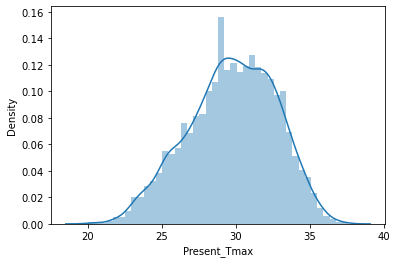

Present_Tmin   -0.35382189672417264


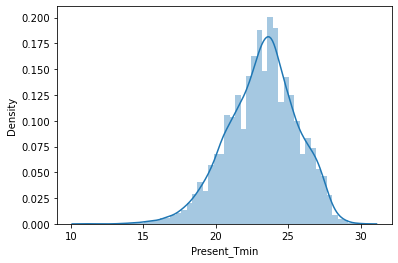

In [17]:
# Checking for the distribution to replace the remaining nulls with statistic values
for i in df.columns :
    if df[i].isnull().sum()!=0 :
        print(i,' ',df[i].skew())
        sns.distplot(df[i])
        plt.show()

Both have a little skewness hence we can fill nulls with median.

In [18]:
# Treating remaining nulls
df['Present_Tmax'].fillna(df['Present_Tmax'].median(),inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].median(),inplace=True)
df.isnull().sum().any()

False

There are no null values in the dataset.

<AxesSubplot:>

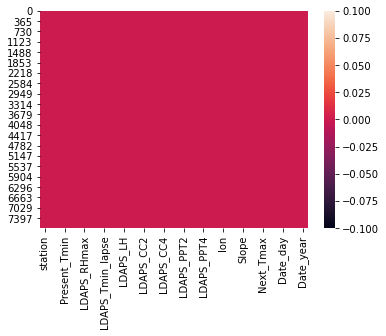

In [19]:
# Visualizing nulls
sns.heatmap(df.isnull())

Map showing 0 null values in the dataset

In [20]:
df['Date_day']=df['Date_day'].apply(np.int64)
df['Date_month']=df['Date_month'].apply(np.int64)
df['Date_year']=df['Date_year'].apply(np.int64)
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Date_day              int64
Date_month            int64
Date_year             int64
dtype: object

In [21]:
# Checking correlation
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
station,1.000000,0.112872,0.132755,-0.068619,-0.169017,0.070405,0.105432,0.004466,-0.132861,0.005905,...,-0.238469,-0.118755,-0.257228,-0.091463,-0.020236,0.108579,0.128259,-0.000144,0.000370,0.001092
Present_Tmax,0.112872,1.000000,0.615219,-0.207946,-0.306022,0.571739,0.626314,-0.125505,0.133733,-0.315122,...,-0.054021,0.007625,-0.188745,-0.106865,-0.021958,0.608022,0.619042,-0.153619,-0.003271,0.055869
Present_Tmin,0.132755,0.615219,1.000000,0.121671,-0.018399,0.466183,0.769116,-0.038601,-0.012858,0.084002,...,-0.081252,-0.044990,-0.253149,-0.148138,0.059617,0.461689,0.794385,-0.115121,-0.010199,0.037571
LDAPS_RHmin,-0.068619,-0.207946,0.121671,1.000000,0.578708,-0.568968,0.086273,0.291812,-0.072808,0.613201,...,0.085831,-0.078049,0.101925,0.123169,0.243192,-0.446496,0.093525,-0.065843,-0.052845,-0.002809
LDAPS_RHmax,-0.169017,-0.306022,-0.018399,0.578708,1.000000,-0.377209,-0.117417,0.132796,0.237706,0.436276,...,0.195513,0.025115,0.177711,0.219983,0.148402,-0.290102,-0.075815,-0.013031,-0.039333,-0.143621
LDAPS_Tmax_lapse,0.070405,0.571739,0.466183,-0.568968,-0.377209,1.000000,0.653320,-0.316285,0.044499,-0.440665,...,-0.044272,0.090616,-0.181668,-0.164176,0.046383,0.835606,0.590082,-0.161630,-0.022904,0.018029
LDAPS_Tmin_lapse,0.105432,0.626314,0.769116,0.086273,-0.117417,0.653320,1.000000,-0.133353,-0.138403,0.008993,...,-0.099021,-0.027018,-0.197844,-0.187815,0.158365,0.591945,0.886617,-0.179096,-0.027658,-0.003379
LDAPS_WS,0.004466,-0.125505,-0.038601,0.291812,0.132796,-0.316285,-0.133353,1.000000,0.003230,0.287090,...,0.034125,-0.063340,0.189932,0.169789,0.121599,-0.351797,-0.101545,-0.030365,-0.081947,-0.114609
LDAPS_LH,-0.132861,0.133733,-0.012858,-0.072808,0.237706,0.044499,-0.138403,0.003230,1.000000,-0.148572,...,0.132059,0.024141,0.055258,0.087111,-0.047480,0.156993,-0.059107,-0.011586,-0.023867,0.056634
LDAPS_CC1,0.005905,-0.315122,0.084002,0.613201,0.436276,-0.440665,0.008993,0.287090,-0.148572,1.000000,...,-0.009495,-0.008510,-0.015024,-0.021905,0.218366,-0.460129,-0.012845,-0.021709,-0.075858,-0.068088


Few features are seem to have a strong correlation with the target. Let's visualize for better understanding.

<AxesSubplot:>

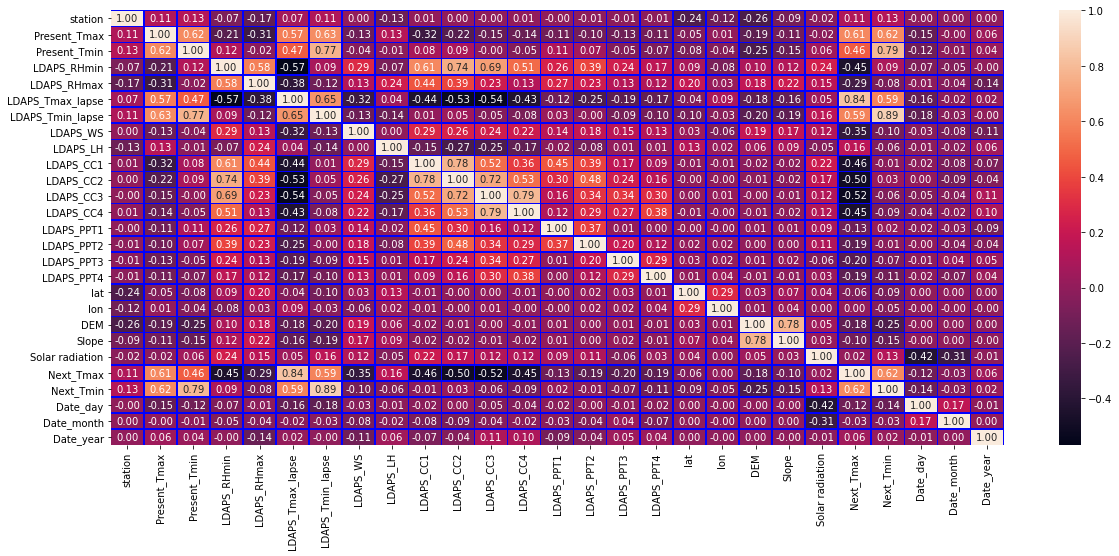

In [22]:
# Visualzing correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Target column 'Next_Tmax' has good coorelation with 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','Next_Tmin' and least correlation with 'lon'. 
Other target column 'Next_Tmin' has good coorelation with 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'DEM', 'Next_Tmax' and least correlation with 'LDAPS_CC1' and 'LDAPS_PPT2'.

'station' has good correlation with 'lat' and 'DEM' and multile columns has good correlation with each other.

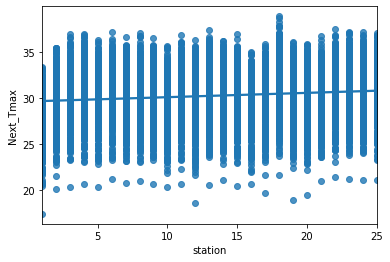

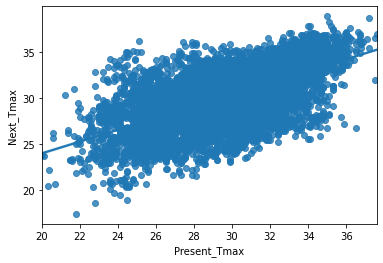

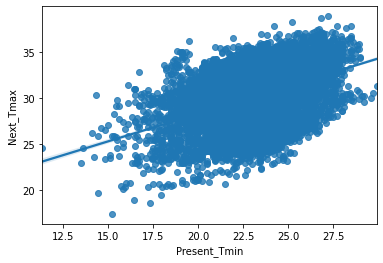

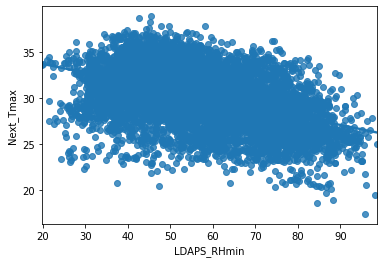

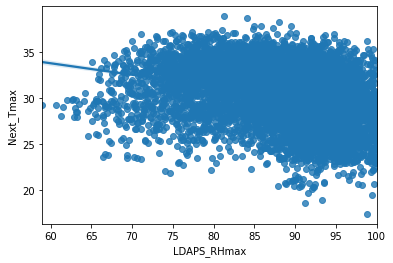

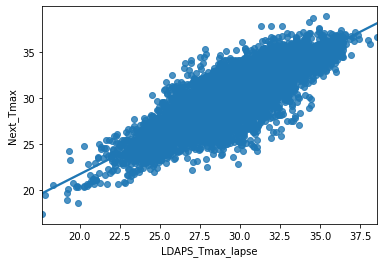

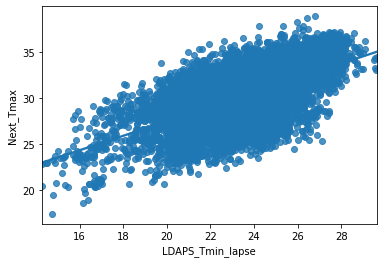

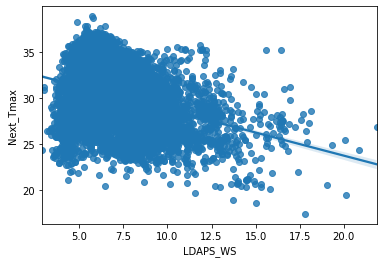

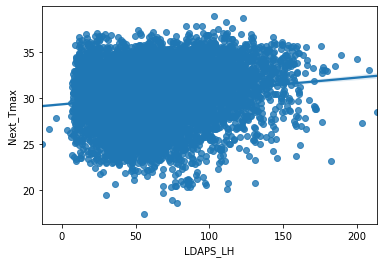

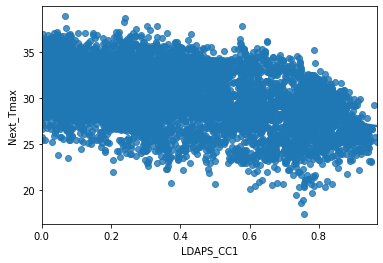

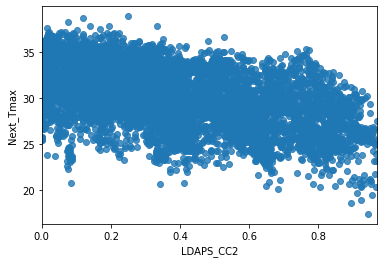

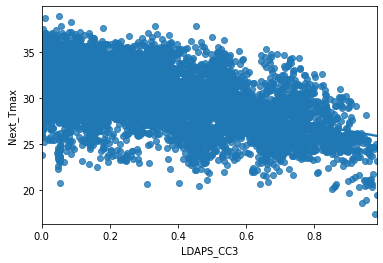

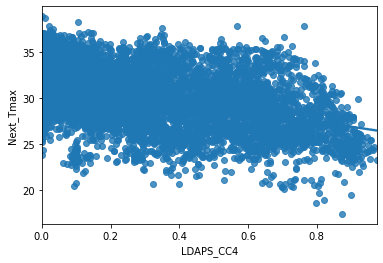

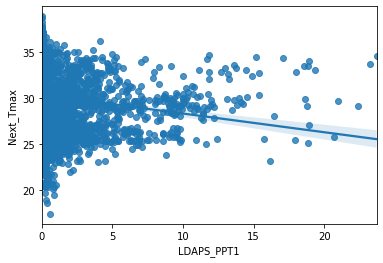

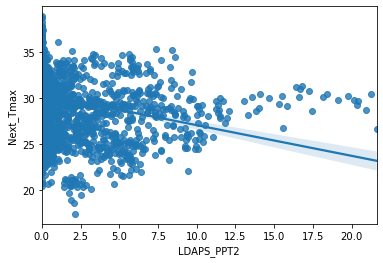

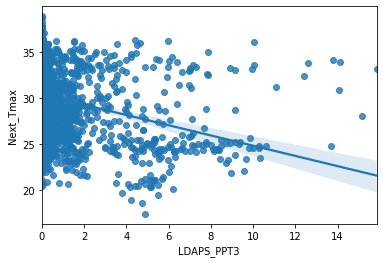

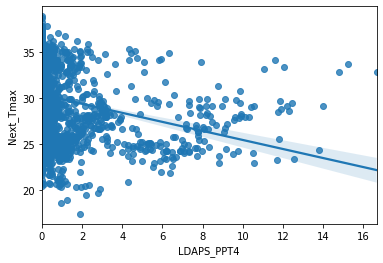

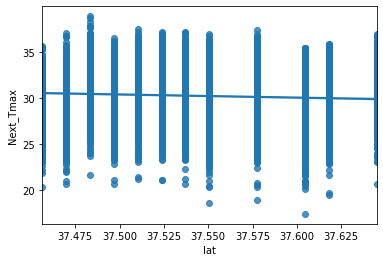

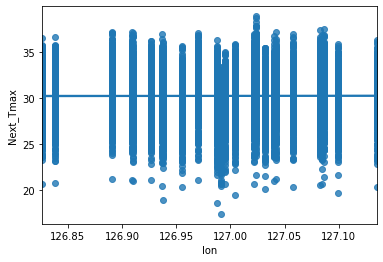

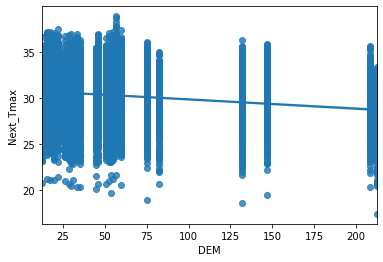

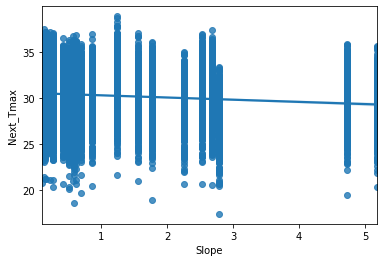

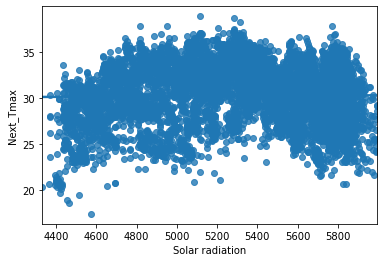

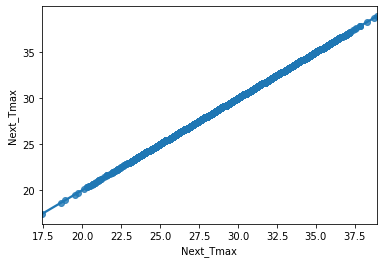

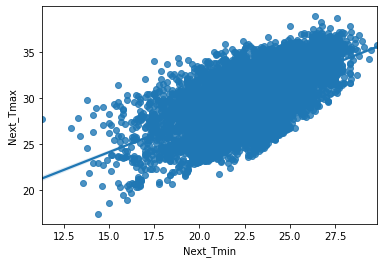

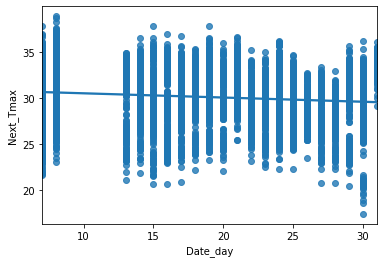

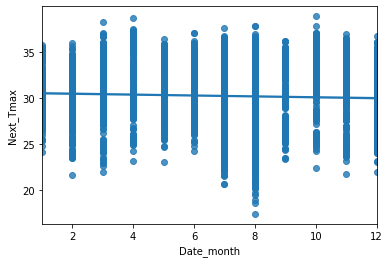

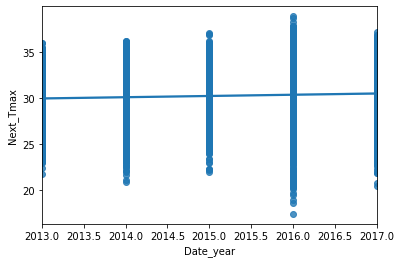

In [23]:
# Plotting target1 with every other column for analysis
for i in df.columns :
    #print(i)
    sns.regplot(i,'Next_Tmax',data=df)
    plt.show()

As per the regplot: Columns 'Present_Tmax','Present_Tmin','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_CC4','Next_Tmin' has good coorelation with linear positive correlated with target 'Next_Tmax'. 'LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3' are linearly negative correlated with target 'Next_Tmax'. 

Rest features have less or no correlation with the target.

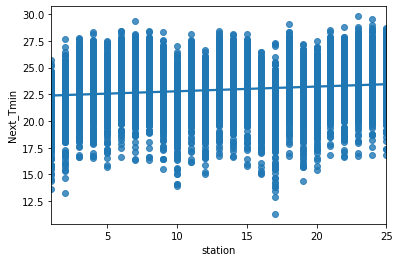

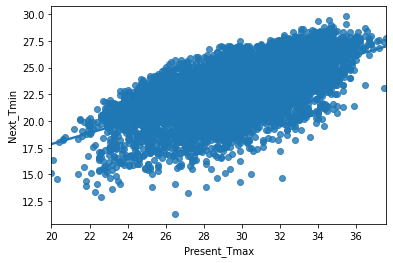

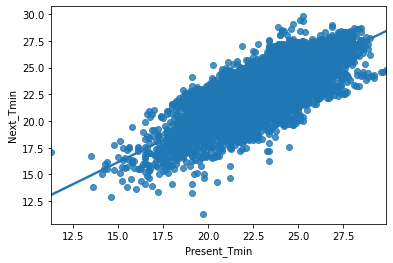

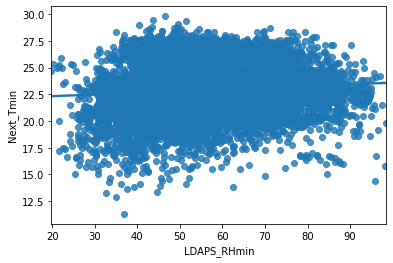

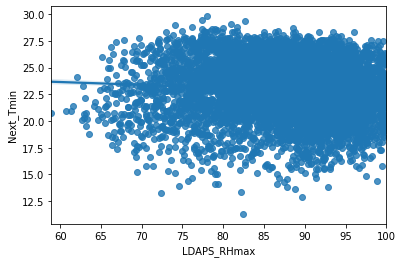

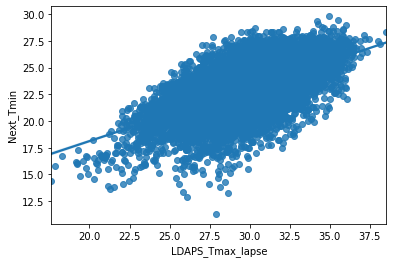

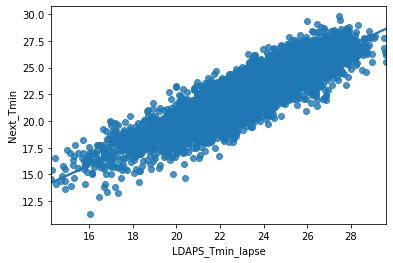

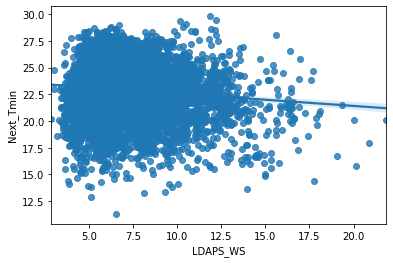

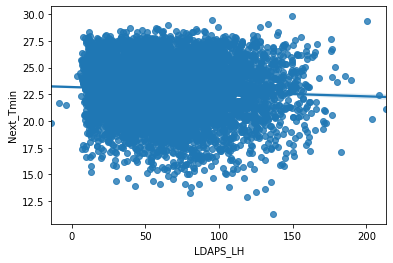

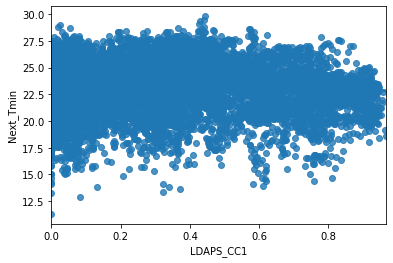

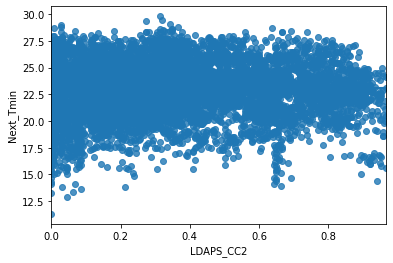

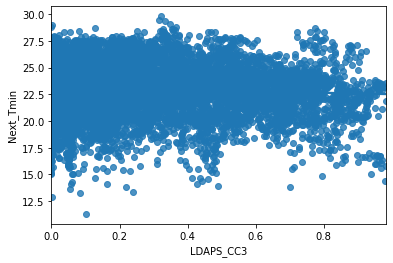

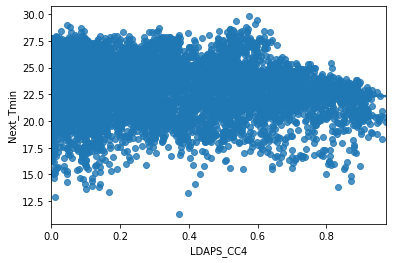

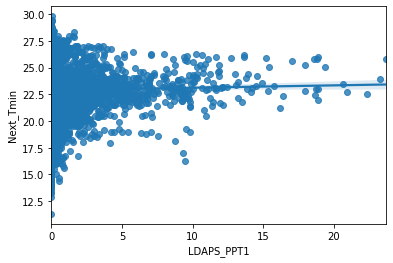

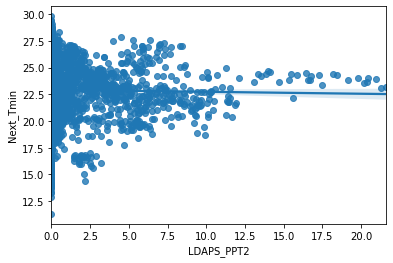

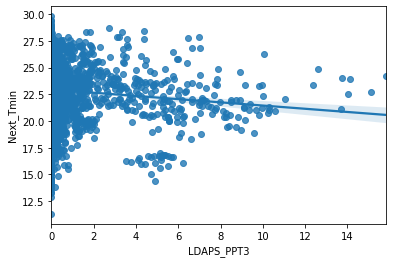

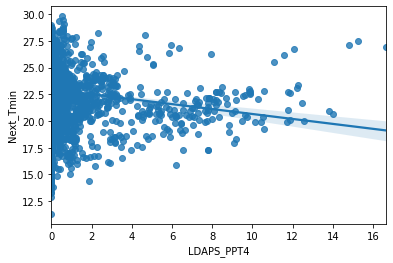

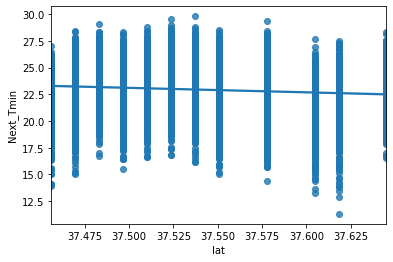

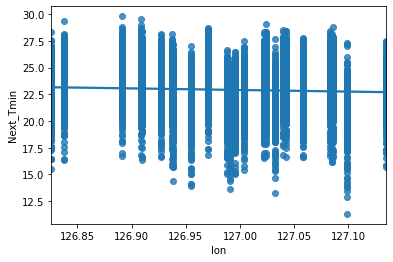

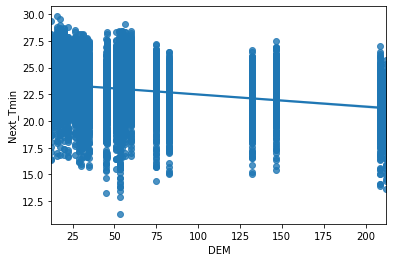

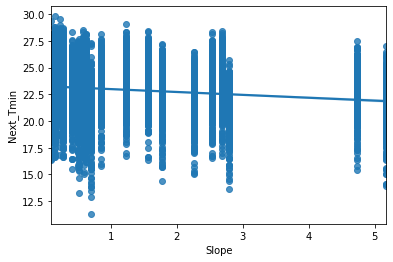

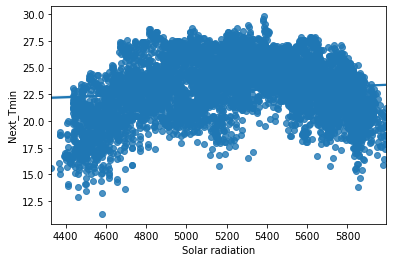

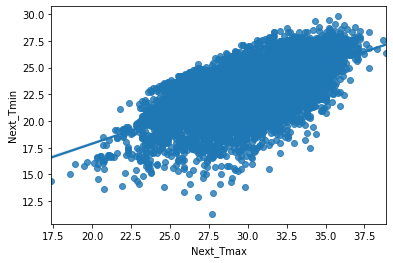

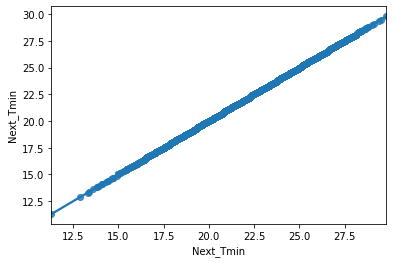

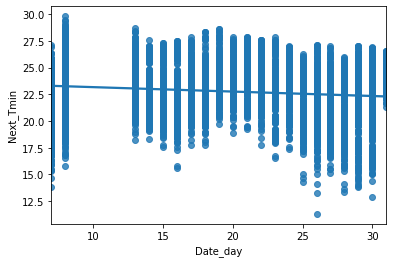

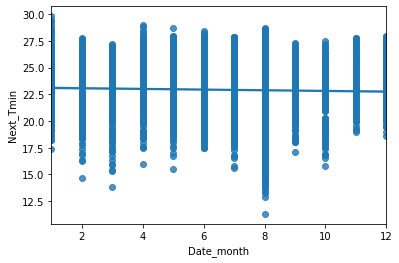

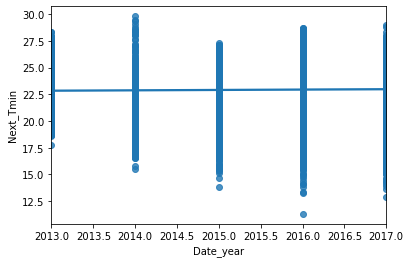

In [24]:
# Plotting target2 with every other column for analysis
for i in df.columns :
    #print(i)
    sns.regplot(i,'Next_Tmin',data=df)
    plt.show()

Other target column 'Next_Tmin' has strong positive coorelation with 'Present_Tmax','Present_Tmin','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','Next_Tmax' and negative linear correlation with 'DEM'.

Rest features have less or no correlation with the target.

In [25]:
# Describe dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
count,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,...,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000
mean,13.008237,29.749555,23.197411,56.740769,88.371467,29.616654,23.512217,7.095360,62.458809,0.368452,...,37.544754,126.991373,61.914375,1.258384,5344.256344,30.238010,22.910774,16.339174,7.067338,2014.997385
std,7.214062,2.955766,2.391510,14.642985,7.190904,2.942035,2.342287,2.175671,33.669420,0.262239,...,0.050370,0.079317,54.309386,1.370729,429.902872,3.111153,2.480482,8.223695,2.242589,1.413841
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,45.962741,84.213987,27.675512,22.089246,5.679477,37.227848,0.146557,...,37.510200,126.937000,28.700000,0.271300,5002.308105,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.017689,89.792492,29.705437,23.758249,6.547838,56.854134,0.315185,...,37.550700,126.995000,45.716000,0.618000,5443.858887,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.153889,93.742725,31.710469,25.153179,8.029525,84.222469,0.573938,...,37.577600,127.042000,59.832400,1.767800,5729.886841,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


Standard deviation seems high for columns : DEM,Solar radiation

Right skewed (mean>median) : Columns LDAPS_LH,DEM,
Left skewed  (mean<median) : Columns Solar radiation

Difference of 50% and max value for detecting outliers seem to be high for column LDAPS_LH,DEM.

In [26]:
# Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([  25,   25,   26, ..., 7641, 7642, 7642], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

We can see there are outliers present in the dataset.

In [89]:
# Checking the outlier in the dataset
z[25][7]

3.912926393211533

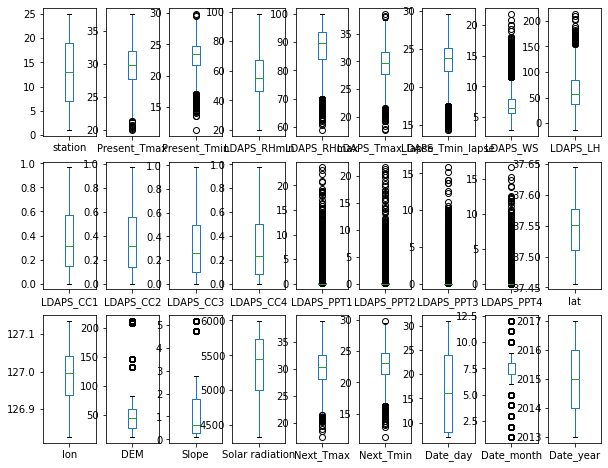

In [28]:
# Visualising outliers
df.plot(kind='box',subplots=True,layout=(3,9), figsize=(10,8))
plt.show()

Plot shows the outliers presence in the columns.

In [29]:
# Checking skewness
df.skew()

station            -0.002800
Present_Tmax       -0.259282
Present_Tmin       -0.357192
LDAPS_RHmin         0.301532
LDAPS_RHmax        -0.845614
LDAPS_Tmax_lapse   -0.222652
LDAPS_Tmin_lapse   -0.575089
LDAPS_WS            1.550978
LDAPS_LH            0.663598
LDAPS_CC1           0.458080
LDAPS_CC2           0.472555
LDAPS_CC3           0.638484
LDAPS_CC4           0.662400
LDAPS_PPT1          5.303822
LDAPS_PPT2          5.692702
LDAPS_PPT3          6.348470
LDAPS_PPT4          6.718651
lat                 0.086463
lon                -0.286661
DEM                 1.721727
Slope               1.560855
Solar radiation    -0.523740
Next_Tmax          -0.335304
Next_Tmin          -0.393463
Date_day            0.246031
Date_month         -0.698259
Date_year           0.009068
dtype: float64

Skewness is present in dataset columns : LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Date_month as acceptable range of the skewness in data is +/-5.

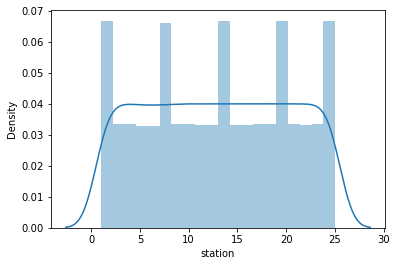

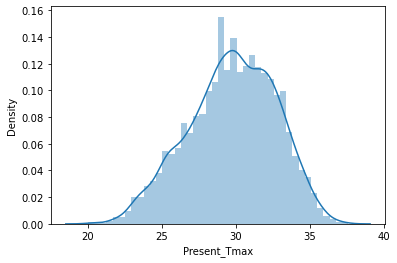

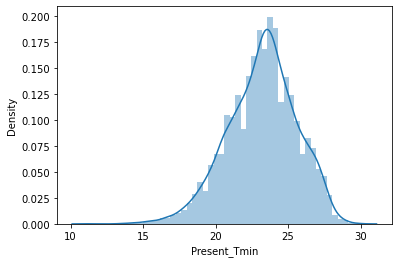

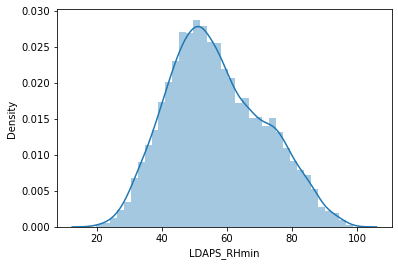

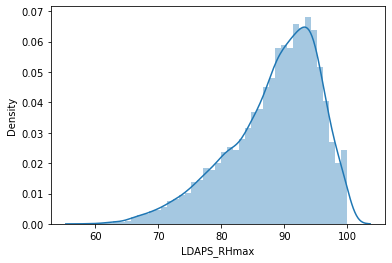

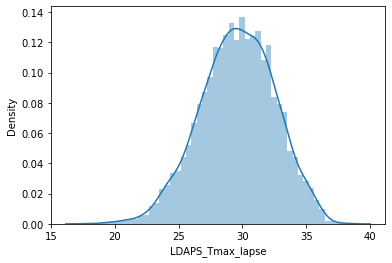

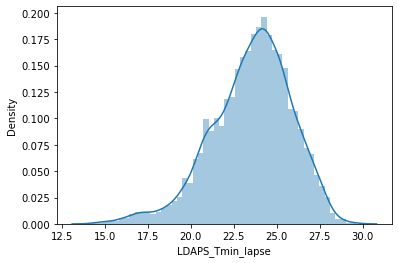

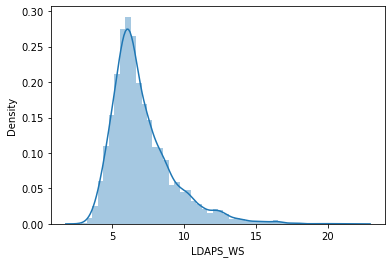

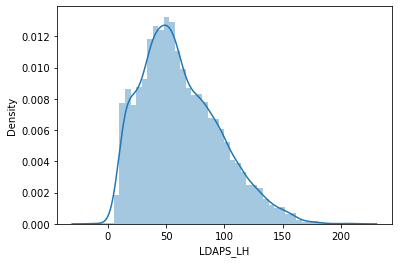

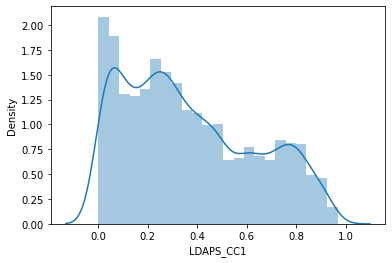

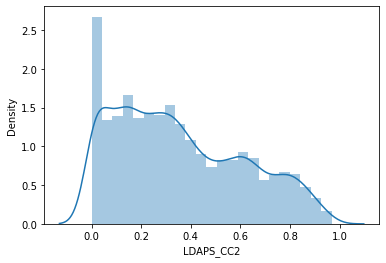

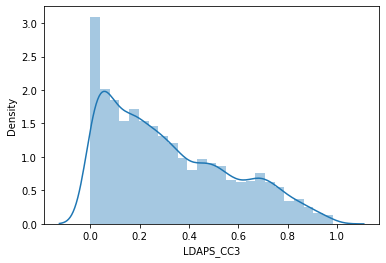

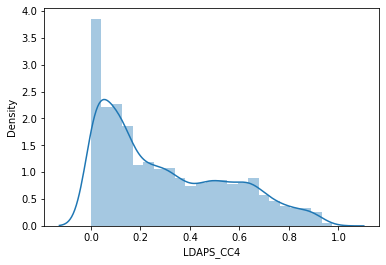

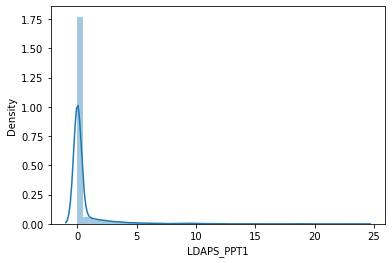

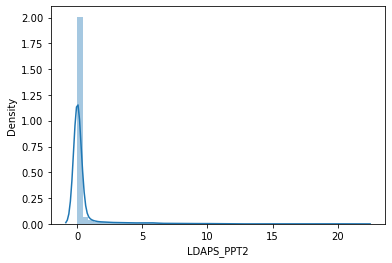

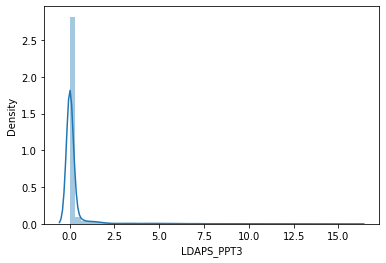

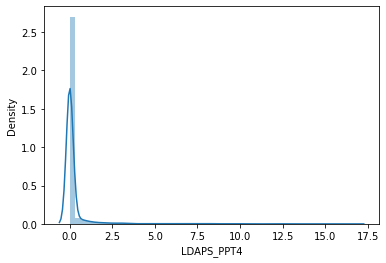

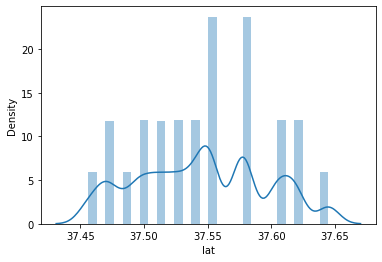

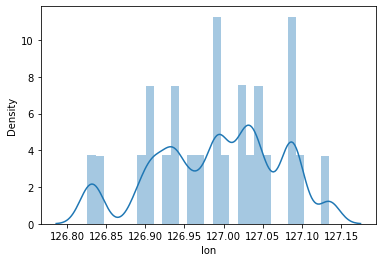

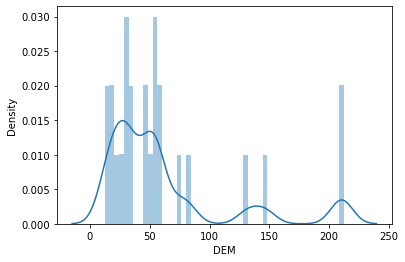

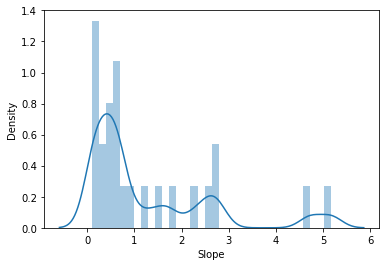

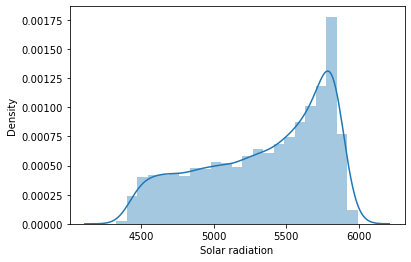

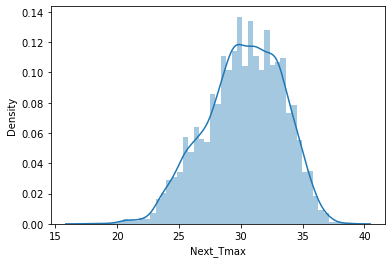

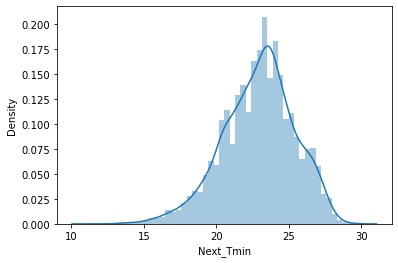

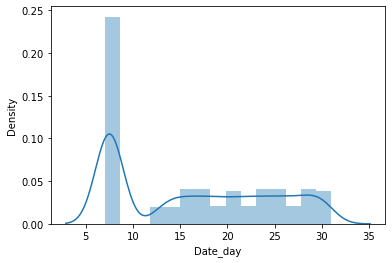

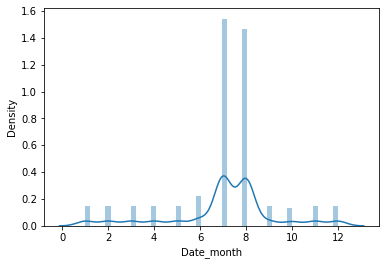

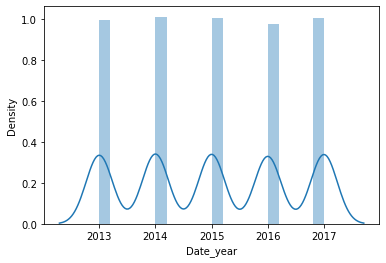

In [30]:
# Visualizing skewness
for i in df.columns :
    sns.distplot(df[i])
    plt.show()

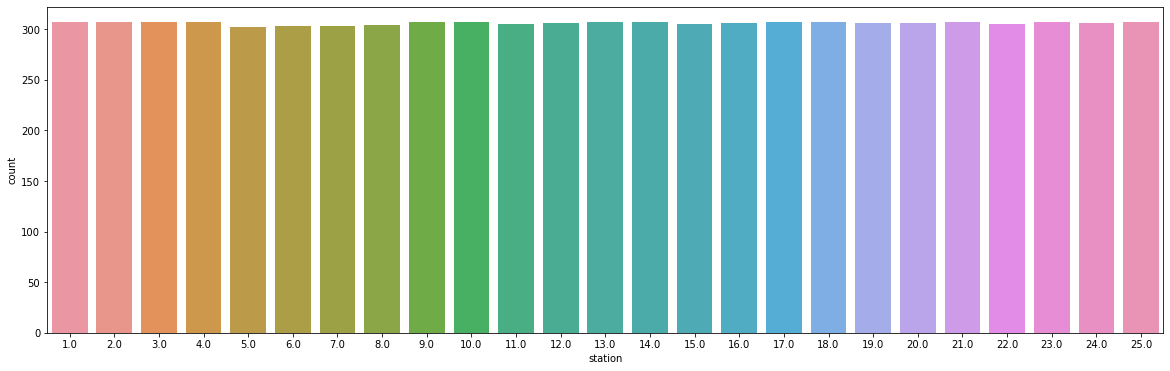

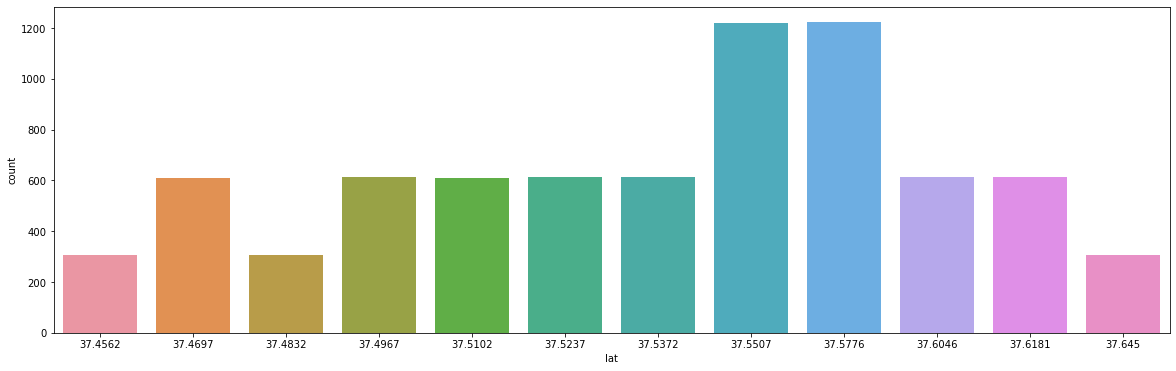

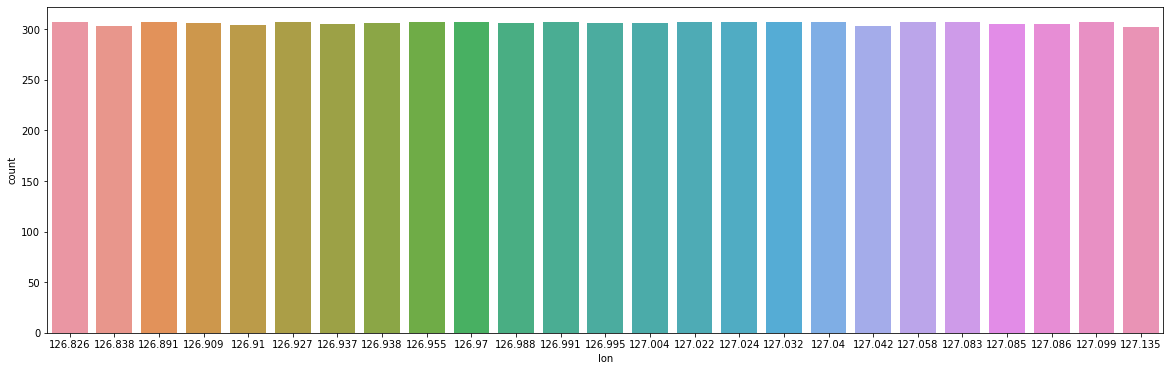

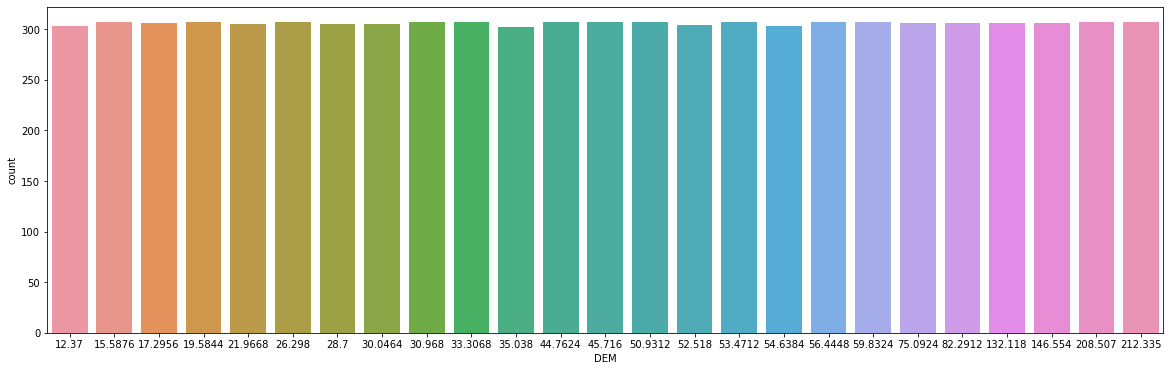

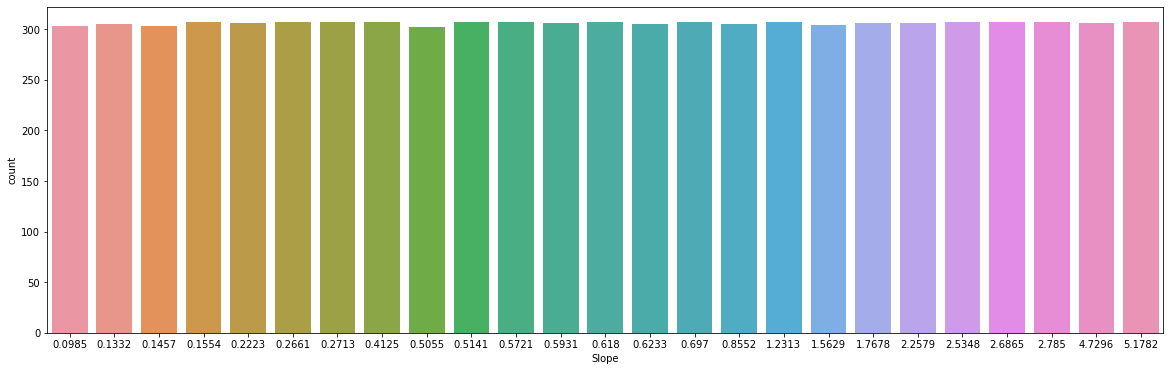

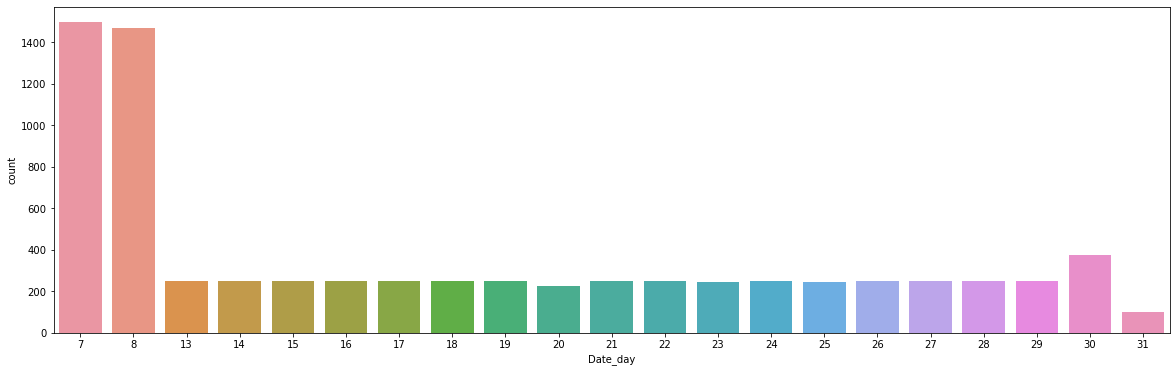

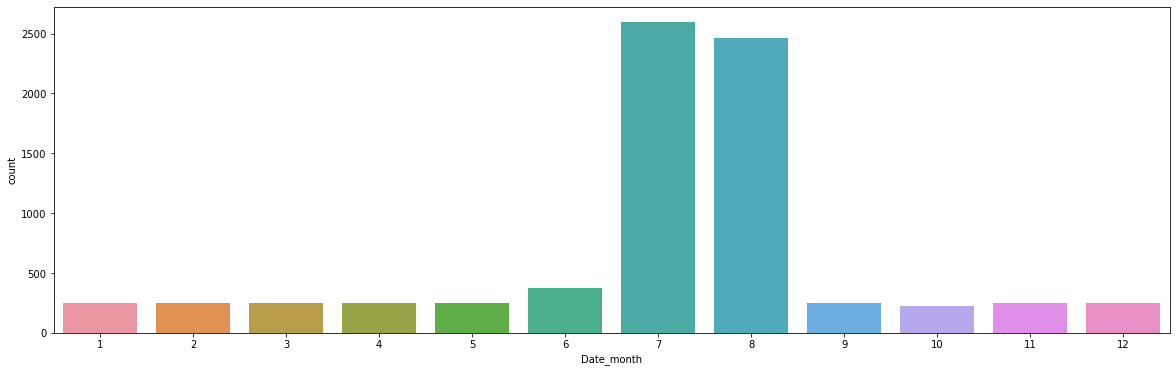

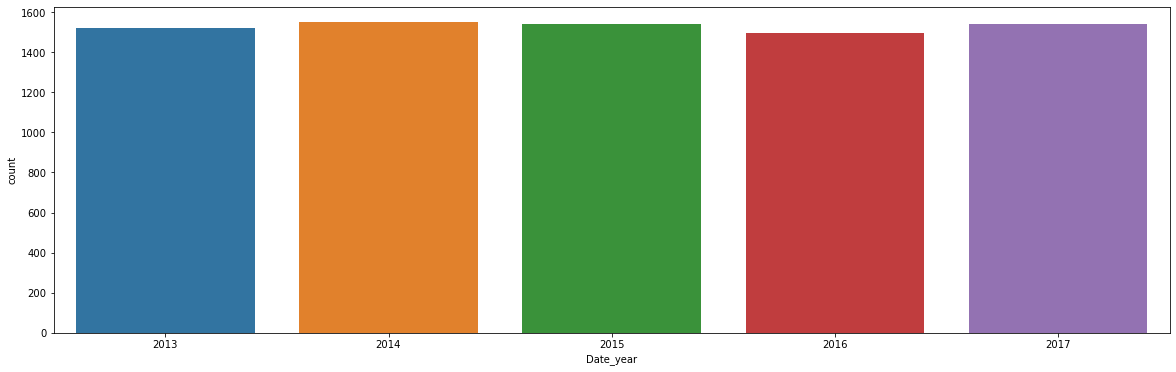

In [31]:
for i in df.columns :
    if (df[i].nunique() <30) :
        plt.figure(figsize=(20,6))
        sns.countplot(df[i])
        plt.show()

Count plot showing 'station','lon','DEM','slope','Date_year' has almost similar count for all values. 'lat' column has highest count for values 37.5507 and 37.5776. 'Date_day' column has 7 value count as highest followed by 8 and least count for 31. 'Date_month' 7 has highest count followed by 8.

<AxesSubplot:xlabel='Date_year', ylabel='Present_Tmax'>

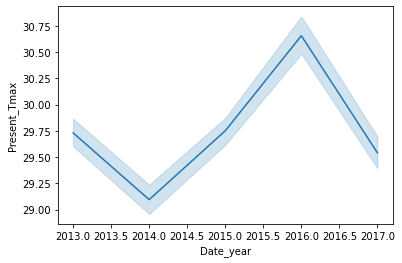

In [139]:
# Lineplot 
sns.lineplot(data=df.sort_values(by=['Date_year','Date_month','Date_day'],ascending=[True,True,True]), x='Date_year', y='Present_Tmax')

Present maximum temperature from 2013 decreases till 29 degree in year 2014 and then increased till 30.75 degree in year 2016 and then again decreases.

<AxesSubplot:xlabel='Date_year', ylabel='Present_Tmin'>

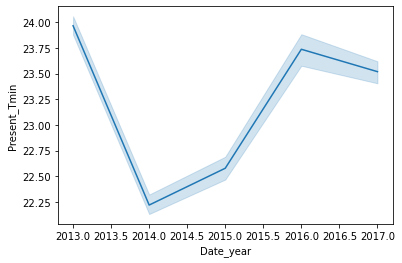

In [140]:
# Lineplot
sns.lineplot(data=df.sort_values(by=['Date_year','Date_month','Date_day'],ascending=[True,True,True]), x='Date_year', y='Present_Tmin')

Present minimum temperature from 2013 decreases till 22.25 degree in year 2014 and then increased to 22.60 degree in year 2015 and again highly increased in 2016 till 23.75 degreeand then slighly decreases in 2017.

<AxesSubplot:xlabel='Date_year', ylabel='Next_Tmax'>

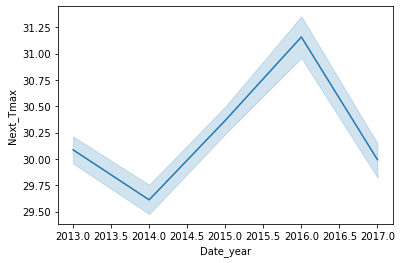

In [141]:
# Lineplot
sns.lineplot(data=df.sort_values(by=['Date_year','Date_month','Date_day'],ascending=[True,True,True]), x='Date_year', y='Next_Tmax')

Next maximum temperature from 2013 decreases till 29.60 degree in year 2014 and then speedy increase till 31.25 degree in year 2016 and then again decreased in 2017.

<AxesSubplot:xlabel='Date_year', ylabel='Next_Tmin'>

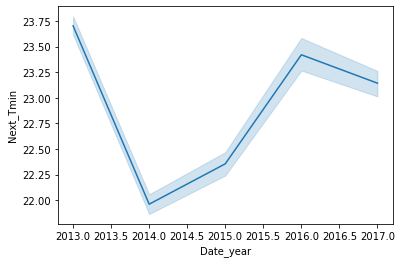

In [147]:
# Lineplot
sns.lineplot(data=df.sort_values(by=['Date_year','Date_month','Date_day'],ascending=[True,True,True]), x='Date_year', y='Next_Tmin')

Next minimum temperature from 2013 with 23.75 degree i.e. highest, decreases till 21.80 degree in year 2014 and then increased to 22.30 degree in year 2015 and then again increased in 2016 till 23.50 and then decreases to 23.25 degrees in 2017.

<AxesSubplot:xlabel='Date_month', ylabel='LDAPS_LH'>

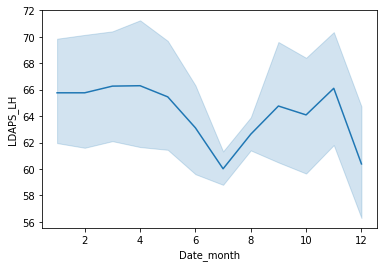

In [151]:
# Lineplot
sns.lineplot(data=df.sort_values(by=['Date_year','Date_month','Date_day'],ascending=[True,True,True]), x='Date_month', y='LDAPS_LH')

LDAPS model forecast of next-day average latent heat flux (W/m2) starting from 66 in 1st month, decreases to approx 60 in 7th month and then increased linearly in 9th month and further had ups and downs as shown. 

### Data Cleaning

In [33]:
# Removing outliers

df1=df.copy()
df1=df1[(z<3).all(axis=1)]
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [34]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (7648, 27)
Shape of dataset after removing outliers :  (6792, 27)


In [35]:
# Percentage Data lost
data_percent=(7648-6792)/7648 * 100
data_percent

11.192468619246862

Approx 11% data is lost after removing the outliers

In [36]:
# Checking skewness after removing outliers
df1.skew()

station            -0.001001
Present_Tmax       -0.270934
Present_Tmin       -0.223653
LDAPS_RHmin         0.309596
LDAPS_RHmax        -0.685908
LDAPS_Tmax_lapse   -0.110760
LDAPS_Tmin_lapse   -0.380304
LDAPS_WS            1.088113
LDAPS_LH            0.567694
LDAPS_CC1           0.596859
LDAPS_CC2           0.505129
LDAPS_CC3           0.701307
LDAPS_CC4           0.709425
LDAPS_PPT1          3.720935
LDAPS_PPT2          4.854627
LDAPS_PPT3          5.502422
LDAPS_PPT4          5.924167
lat                 0.107222
lon                -0.276084
DEM                 1.762994
Slope               1.592240
Solar radiation    -0.519044
Next_Tmax          -0.268702
Next_Tmin          -0.234589
Date_day            0.255911
Date_month         -0.675810
Date_year           0.021298
dtype: float64

We can see high skewness is present in the columns : LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Date_month.

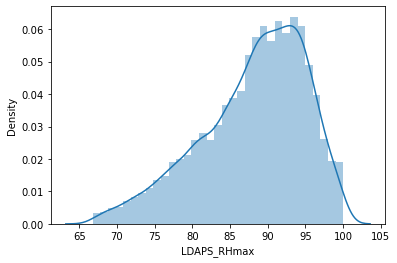

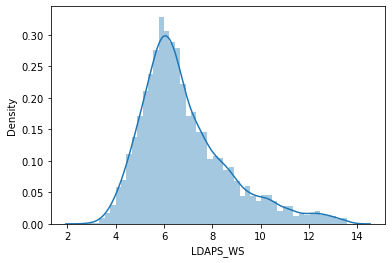

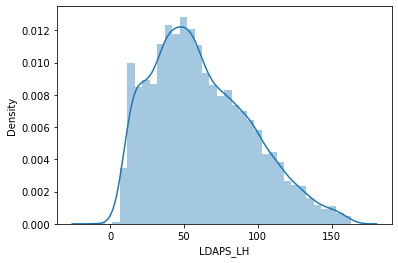

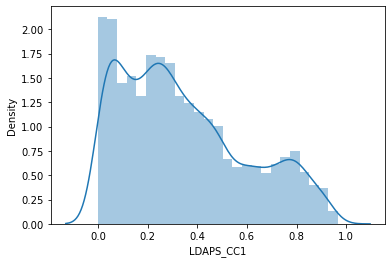

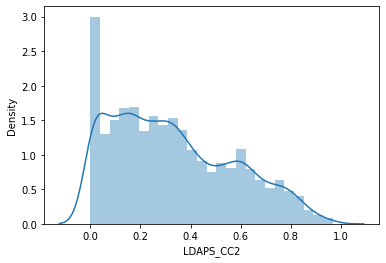

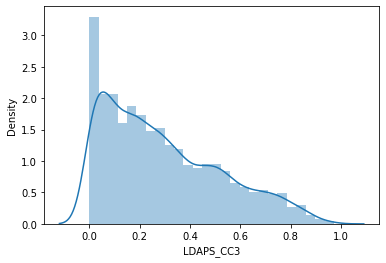

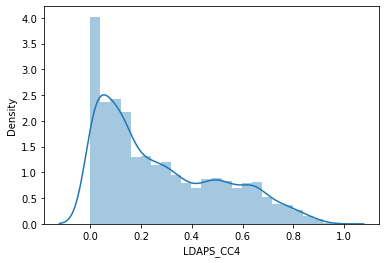

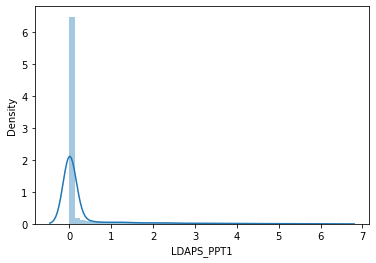

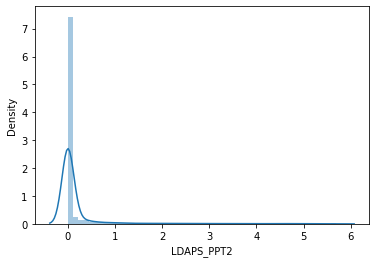

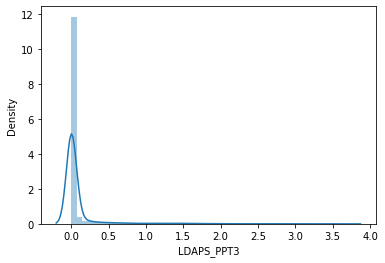

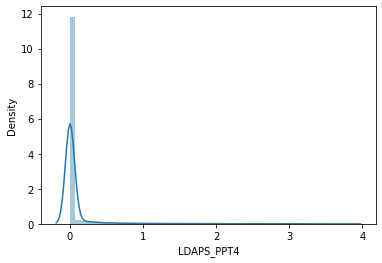

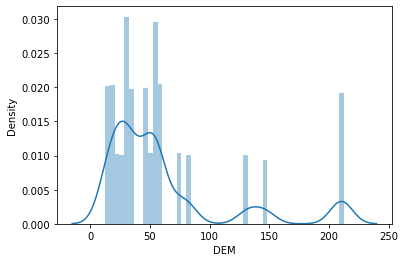

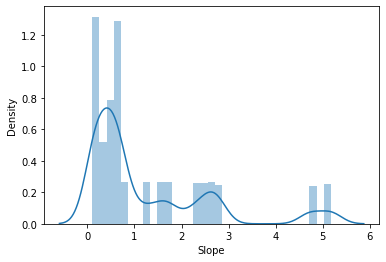

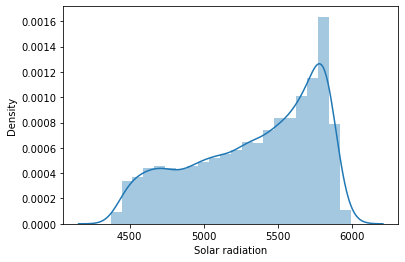

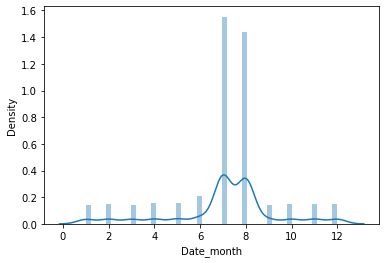

In [37]:
# Visualizng skewness
df2=df1.copy()
skew_list=['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Date_month']
for i in skew_list :
    sns.distplot(df2[i])
    plt.show()

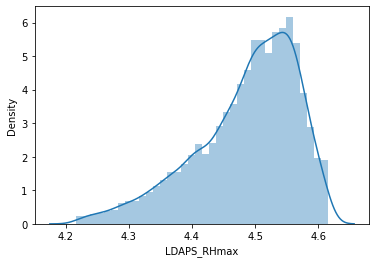

-0.8674203724274931


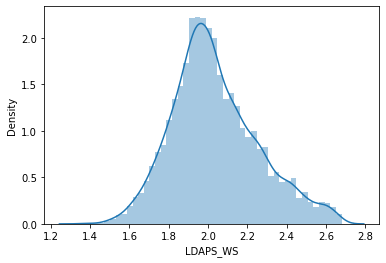

0.47624376017698405


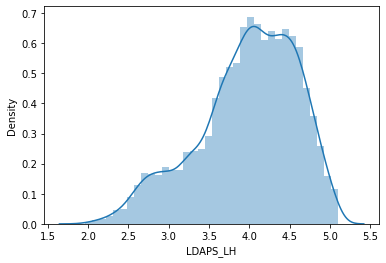

-0.616221219753744


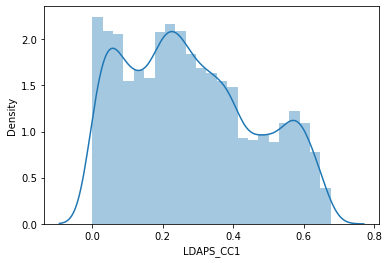

0.3314795391123358


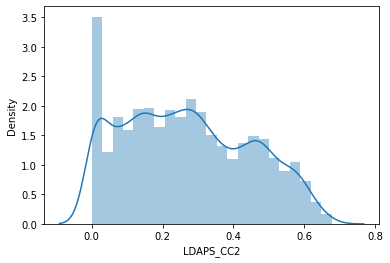

0.2456803584787076


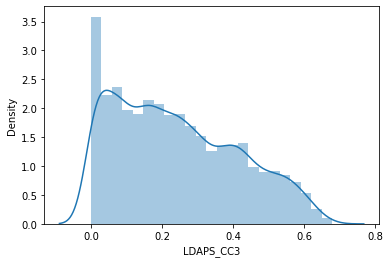

0.44022351824634476


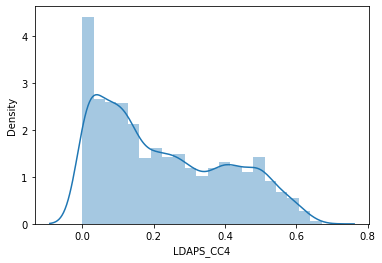

0.49569573653578236


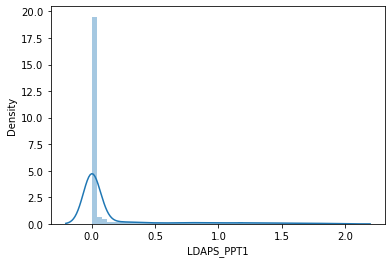

2.7461689390895043


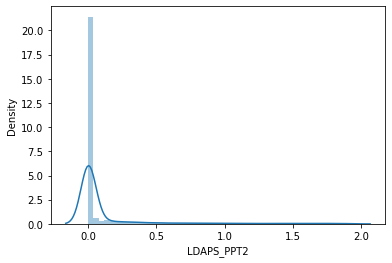

3.639620960735941


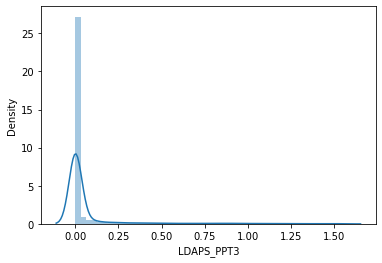

4.222588726039201


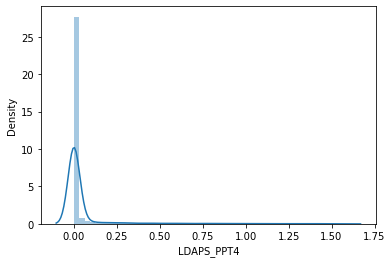

4.607483283355312


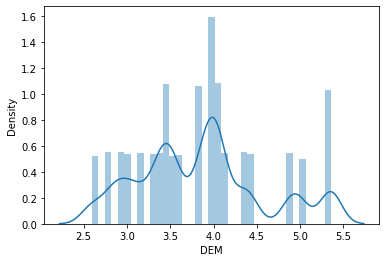

0.4509550305755411


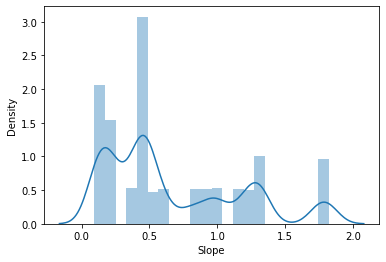

0.8470503254069748


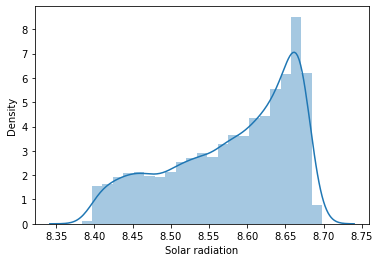

-0.6173803322817356


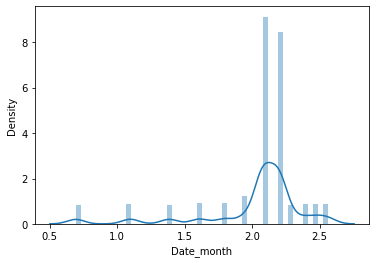

-1.9830525059178483


In [38]:
# Removing skewness
for i in skew_list :
    if ((df2[i].skew()>0.5) | (df2[i].skew()<-0.5)) :
        df2[i]=np.log(df1[i]+1)
        sns.distplot(df2[i])
        plt.show()
        print(df2[i].skew())

Removed the skewness from columns LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope. But it is still present in columns LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4.

In [39]:
# Again removing the skewness from columns
for i in ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'] :
    if ((df2[i].skew()>0.5) | (df2[i].skew()<-0.5)) :
        df2[i]=np.log(df2[i]+1)
        print(i,' ',df2[i].skew())

LDAPS_PPT1   2.398211505072027
LDAPS_PPT2   3.115310695486314
LDAPS_PPT3   3.6830809470249757
LDAPS_PPT4   4.040552347101032


In [40]:
# Again removing the skewness from columns
for i in ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'] :
    if ((df2[i].skew()>0.5) | (df2[i].skew()<-0.5)) :
        df2[i]=np.log(df2[i]+1)
        print(i,' ',df2[i].skew())

LDAPS_PPT1   2.2096580026200257
LDAPS_PPT2   2.81613661520426
LDAPS_PPT3   3.3712383357489704
LDAPS_PPT4   3.714792355189698


In [41]:
# Plotting Q-Q plot for showing gaussian distribution
def diagnostic_plot(df2,col) :
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10)
    
    plt.subplot(1,2,2)
    stats.probplot(df2[col],dist='norm',plot=plt)
    
    plt.show()

station


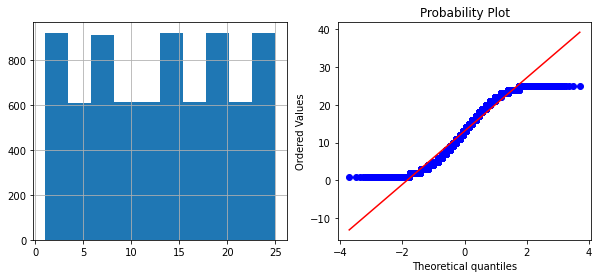

Present_Tmax


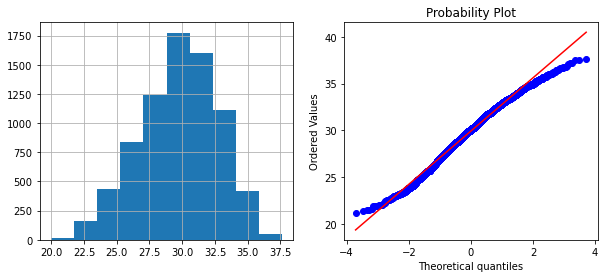

Present_Tmin


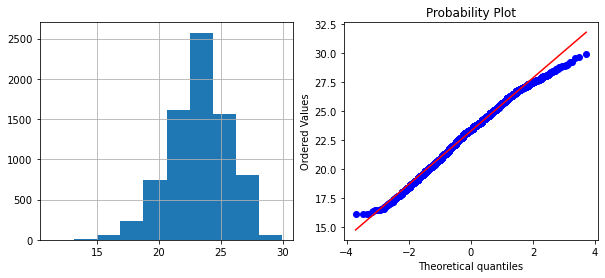

LDAPS_RHmin


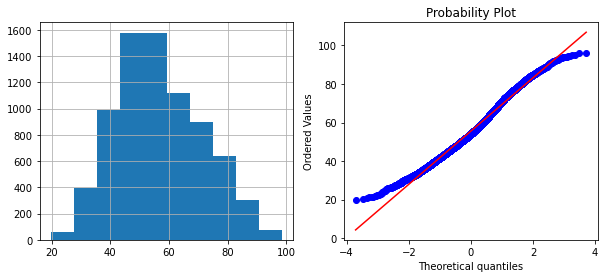

LDAPS_RHmax


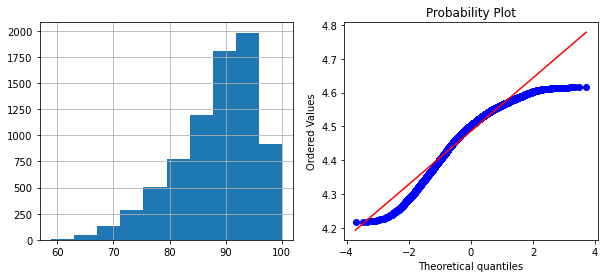

LDAPS_Tmax_lapse


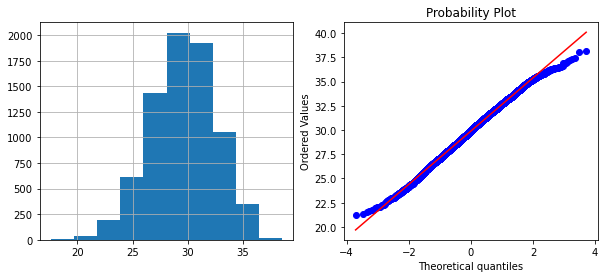

LDAPS_Tmin_lapse


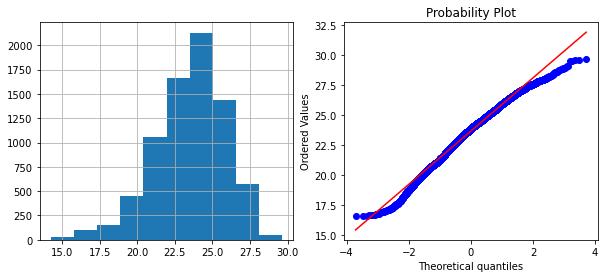

LDAPS_WS


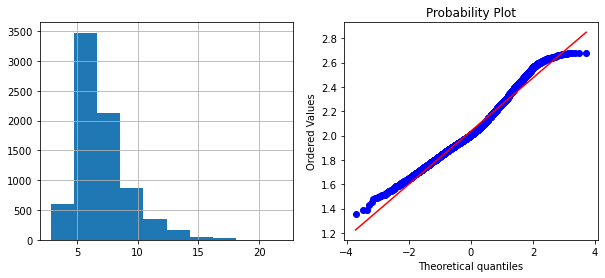

LDAPS_LH


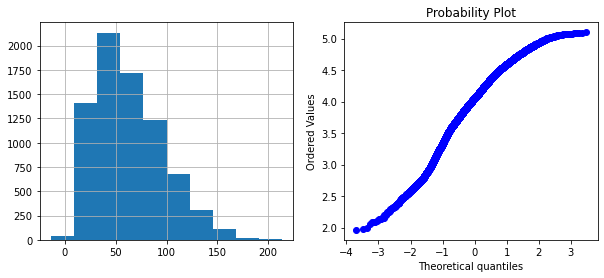

LDAPS_CC1


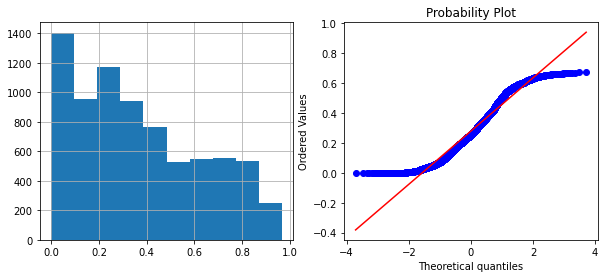

LDAPS_CC2


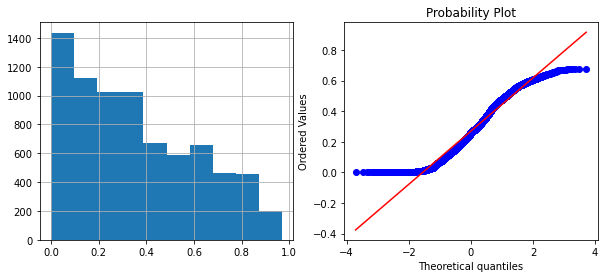

LDAPS_CC3


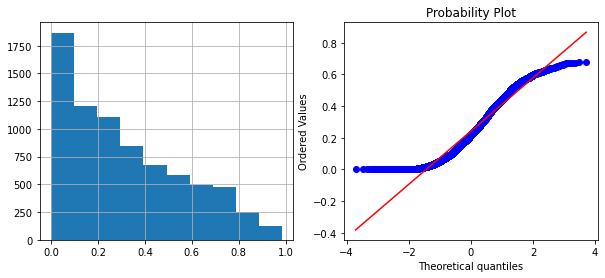

LDAPS_CC4


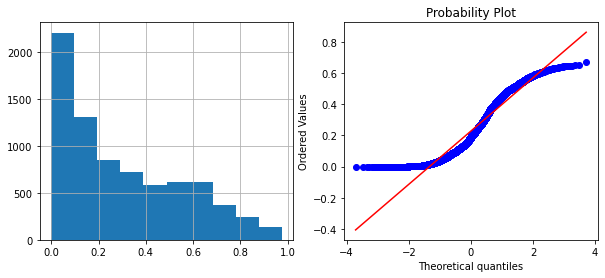

LDAPS_PPT1


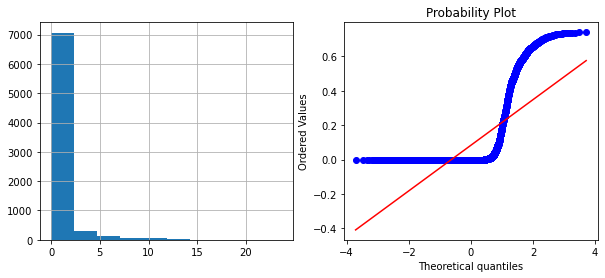

LDAPS_PPT2


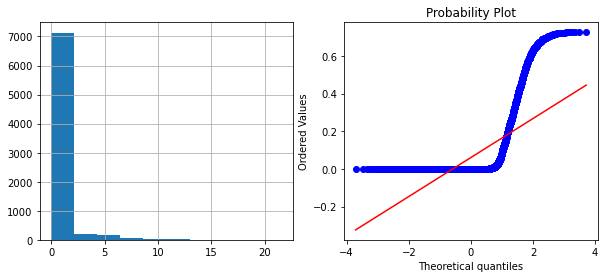

LDAPS_PPT3


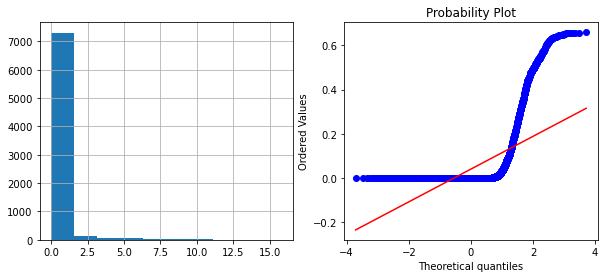

LDAPS_PPT4


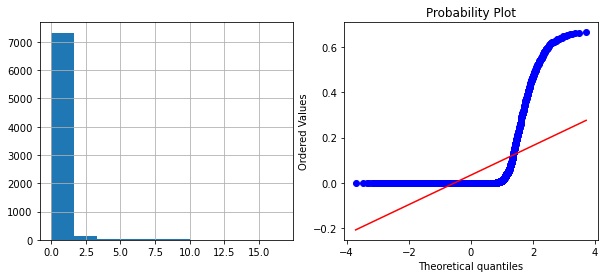

lat


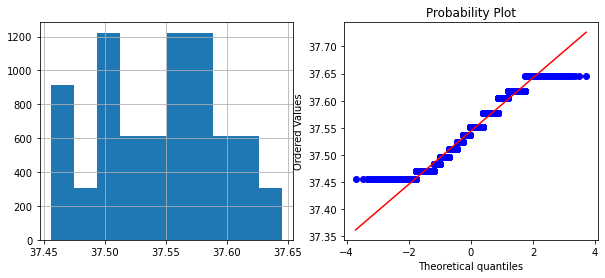

lon


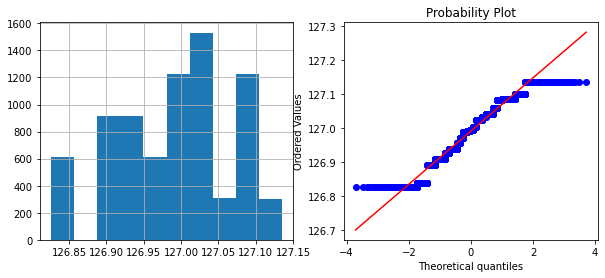

DEM


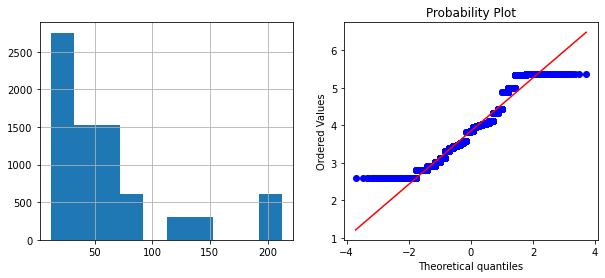

Slope


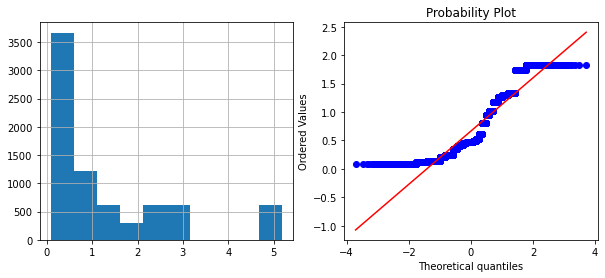

Solar radiation


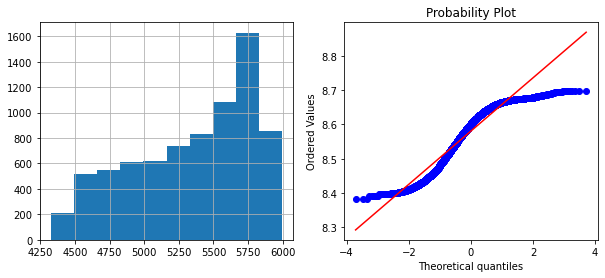

Next_Tmax


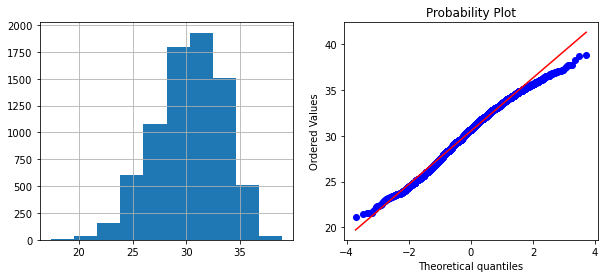

Next_Tmin


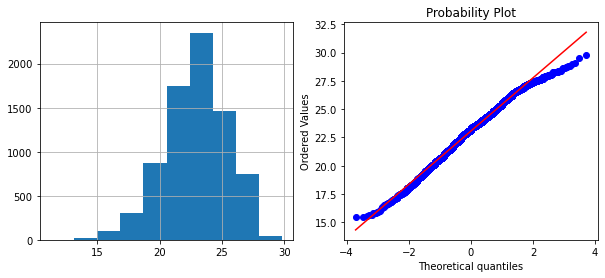

Date_day


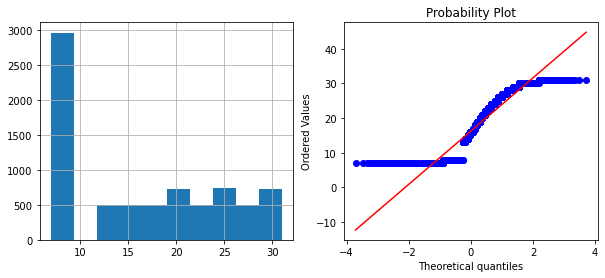

Date_month


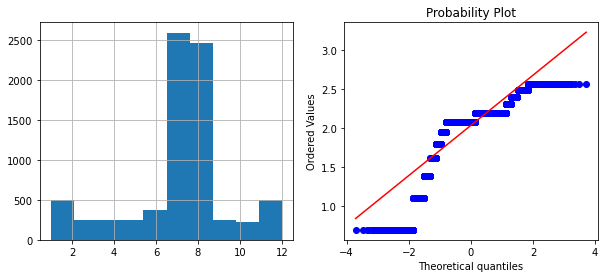

Date_year


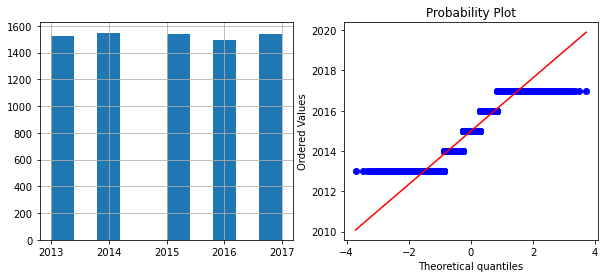

In [42]:
for i in df2.columns :
    print(i)
    diagnostic_plot(df2,i)

Above probablity plots showing the skewed data .

In [43]:
from scipy.stats import boxcox,yeojohnson
#df3=df2.copy()
df2['LDAPS_PPT1']=yeojohnson(df2['LDAPS_PPT1'],0)
df2['LDAPS_PPT2']=yeojohnson(df2['LDAPS_PPT2'],0)
df2['LDAPS_PPT3']=yeojohnson(df2['LDAPS_PPT3'],0)
df2['LDAPS_PPT4']=yeojohnson(df2['LDAPS_PPT4'],0)
df2.skew()

station            -0.001001
Present_Tmax       -0.270934
Present_Tmin       -0.223653
LDAPS_RHmin         0.309596
LDAPS_RHmax        -0.867420
LDAPS_Tmax_lapse   -0.110760
LDAPS_Tmin_lapse   -0.380304
LDAPS_WS            0.476244
LDAPS_LH           -0.616221
LDAPS_CC1           0.331480
LDAPS_CC2           0.245680
LDAPS_CC3           0.440224
LDAPS_CC4           0.495696
LDAPS_PPT1          2.086231
LDAPS_PPT2          2.619720
LDAPS_PPT3          3.160692
LDAPS_PPT4          3.497933
lat                 0.107222
lon                -0.276084
DEM                 0.450955
Slope               0.847050
Solar radiation    -0.617380
Next_Tmax          -0.268702
Next_Tmin          -0.234589
Date_day            0.255911
Date_month         -1.983053
Date_year           0.021298
dtype: float64

Removed skewness from the dataset, but skewness is increasing in columns LDAPS_RHmax, LDAPS_LH, Solar radiation, Date_month hence based on the data distribution current values can be considered as the threshold.

In [44]:
# New dataset
df2

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,4.523053,28.074101,23.006936,2.056542,4.254929,0.210218,...,37.6046,126.991,5.362864,1.331046,8.698497,29.1,21.2,30,1.945910,2013
1,2.0,31.9,21.6,52.263397,4.517483,29.850689,24.035009,1.900896,3.969111,0.203356,...,37.6046,127.032,3.823463,0.414821,8.677663,30.5,22.5,30,1.945910,2013
2,3.0,31.6,23.3,48.690479,4.442340,30.091292,24.565633,1.965464,3.071445,0.190078,...,37.5776,127.058,3.535344,0.235941,8.676682,31.1,23.9,30,1.945910,2013
3,4.0,32.0,23.4,58.239788,4.579685,29.704629,23.326177,1.894624,4.200612,0.195873,...,37.6450,127.022,3.844087,1.262657,8.675558,31.7,24.3,30,1.945910,2013
4,5.0,31.4,21.9,56.174095,4.512563,29.113934,23.486480,1.907318,4.691032,0.140985,...,37.5507,127.135,3.584574,0.409125,8.675999,31.2,22.5,30,1.945910,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.372751,27.812697,18.303014,2.028576,2.362181,0.051550,...,37.5507,127.040,3.306813,0.452412,8.402237,27.6,17.7,30,2.197225,2017
7746,22.0,22.5,17.4,30.094858,4.438998,26.704905,17.814038,1.912218,4.420607,0.064346,...,37.5102,127.086,3.134050,0.125045,8.399041,28.0,17.1,30,2.197225,2017
7747,23.0,23.3,17.1,26.741310,4.380399,26.352081,18.775678,1.966961,4.291258,0.029592,...,37.5372,126.891,2.808655,0.144447,8.399381,28.3,18.1,30,2.197225,2017
7748,24.0,23.3,17.7,24.040634,4.360483,27.010193,18.733519,2.020596,3.876219,0.035245,...,37.5237,126.909,2.906661,0.200734,8.398269,28.6,18.8,30,2.197225,2017


## First considering the target as 'Next_Tmax'

In [45]:
# Treating missing data in between valid data
df2 = df2.fillna(method='ffill')
print(df2.shape)

(6792, 27)


There are no nulls in front end but there are missing data in between valid data hence need to deal with it as it will create error : 'MissingDataError: exog contains inf or nans' while calculating the multicollinearity.

### Separating columns into x and y

In [46]:
x=df2.drop('Next_Tmax',axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,4.523053,28.074101,23.006936,2.056542,4.254929,0.210218,...,0.0,37.6046,126.991,5.362864,1.331046,8.698497,21.2,30,1.945910,2013
1,2.0,31.9,21.6,52.263397,4.517483,29.850689,24.035009,1.900896,3.969111,0.203356,...,0.0,37.6046,127.032,3.823463,0.414821,8.677663,22.5,30,1.945910,2013
2,3.0,31.6,23.3,48.690479,4.442340,30.091292,24.565633,1.965464,3.071445,0.190078,...,0.0,37.5776,127.058,3.535344,0.235941,8.676682,23.9,30,1.945910,2013
3,4.0,32.0,23.4,58.239788,4.579685,29.704629,23.326177,1.894624,4.200612,0.195873,...,0.0,37.6450,127.022,3.844087,1.262657,8.675558,24.3,30,1.945910,2013
4,5.0,31.4,21.9,56.174095,4.512563,29.113934,23.486480,1.907318,4.691032,0.140985,...,0.0,37.5507,127.135,3.584574,0.409125,8.675999,22.5,30,1.945910,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.372751,27.812697,18.303014,2.028576,2.362181,0.051550,...,0.0,37.5507,127.040,3.306813,0.452412,8.402237,17.7,30,2.197225,2017
7746,22.0,22.5,17.4,30.094858,4.438998,26.704905,17.814038,1.912218,4.420607,0.064346,...,0.0,37.5102,127.086,3.134050,0.125045,8.399041,17.1,30,2.197225,2017
7747,23.0,23.3,17.1,26.741310,4.380399,26.352081,18.775678,1.966961,4.291258,0.029592,...,0.0,37.5372,126.891,2.808655,0.144447,8.399381,18.1,30,2.197225,2017
7748,24.0,23.3,17.7,24.040634,4.360483,27.010193,18.733519,2.020596,3.876219,0.035245,...,0.0,37.5237,126.909,2.906661,0.200734,8.398269,18.8,30,2.197225,2017


In [47]:
y=df2['Next_Tmax']
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6792, dtype: float64

In [48]:
print('Orginal dataset shape: ',df2.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (6792, 27)
Shape of data in x :  (6792, 26)
Shape of data in x :  (6792,)


### Multicollinearity with VIF

In [49]:
# Importing libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Checking multicollinearity of every column

def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,station,5.471586e+00
1,Present_Tmax,3.111967e+02
2,Present_Tmin,3.445230e+02
3,LDAPS_RHmin,1.023227e+02
4,LDAPS_RHmax,6.800871e+03
5,LDAPS_Tmax_lapse,8.185220e+02
6,LDAPS_Tmin_lapse,9.721284e+02
7,LDAPS_WS,1.057168e+02
8,LDAPS_LH,6.406885e+01
9,LDAPS_CC1,1.429634e+01


In [51]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('lon',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.444065
1,Present_Tmax,311.174769
2,Present_Tmin,343.636973
3,LDAPS_RHmin,100.062679
4,LDAPS_RHmax,6722.787498
5,LDAPS_Tmax_lapse,818.229800
6,LDAPS_Tmin_lapse,971.416060
7,LDAPS_WS,105.550263
8,LDAPS_LH,63.980048
9,LDAPS_CC1,14.295795


'Date_year' and 'lat' still have High collinearity and Both are weakly correlated with target.

In [52]:
xn=xn.drop(['Date_year'],axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.171159
1,Present_Tmax,310.154248
2,Present_Tmin,340.465830
3,LDAPS_RHmin,98.491645
4,LDAPS_RHmax,6678.278315
5,LDAPS_Tmax_lapse,808.292493
6,LDAPS_Tmin_lapse,969.416789
7,LDAPS_WS,104.988155
8,LDAPS_LH,63.678611
9,LDAPS_CC1,14.295566


High Multicollinearity is still present in lat and Solar radiation. Both are weakly correlated with target.

In [53]:
# Drop highest collinear column and check multicollinearity
xn=xn.drop('lat',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.168871
1,Present_Tmax,303.647862
2,Present_Tmin,339.731923
3,LDAPS_RHmin,90.459979
4,LDAPS_RHmax,4824.932942
5,LDAPS_Tmax_lapse,801.574429
6,LDAPS_Tmin_lapse,964.780892
7,LDAPS_WS,104.584693
8,LDAPS_LH,63.207499
9,LDAPS_CC1,14.185322


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [54]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(xn)
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.672844,-0.427356,-0.818204,0.194290,0.453882,-0.661985,-0.290307,0.090941,0.452943,-0.379524,...,-0.465792,-0.409739,-0.362739,-0.325772,2.090631,1.332955,1.457995,-0.791471,1.671701,-0.234947
1,-1.534036,0.692948,-0.731187,-0.237609,0.385062,-0.015531,0.171271,-0.614336,-0.012569,-0.417262,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.026769,-0.501670,1.200195,-0.239449,1.671701,-0.234947
2,-1.395229,0.587919,0.008456,-0.495130,-0.543388,0.072018,0.409507,-0.321761,-1.474599,-0.490277,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.423068,-0.859855,1.188054,0.355035,1.671701,-0.234947
3,-1.256421,0.727957,0.051964,0.193144,1.153626,-0.068678,-0.146976,-0.642756,0.364477,-0.458411,...,-0.465792,-0.409739,-0.362739,-0.325772,0.001599,1.196014,1.174140,0.524888,1.671701,-0.234947
4,-1.117613,0.517900,-0.600662,0.044257,0.324271,-0.283617,-0.075005,-0.585236,1.163224,-0.760242,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.355353,-0.513076,1.179604,-0.239449,1.671701,-0.234947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,1.103308,-2.387888,-2.384507,-2.225054,-1.403226,-0.757103,-2.402246,-0.035781,-2.629778,-1.252043,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.737404,-0.426398,-2.207980,-2.277683,1.671701,0.438390
6788,1.242115,-2.597945,-2.558541,-1.835423,-0.584690,-1.160200,-2.621783,-0.563035,0.722783,-1.181680,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.975036,-1.081909,-2.247525,-2.532462,1.671701,0.438390
6789,1.380923,-2.317869,-2.689066,-2.077132,-1.308735,-1.288584,-2.190031,-0.314978,0.512112,-1.372792,...,-0.465792,-0.409739,-0.362739,-0.325772,-1.422606,-1.043061,-2.243319,-2.107830,1.671701,0.438390
6790,1.519730,-2.317869,-2.428016,-2.271785,-1.554803,-1.049114,-2.208960,-0.071942,-0.163862,-1.341704,...,-0.465792,-0.409739,-0.362739,-0.325772,-1.287803,-0.930352,-2.257082,-1.810588,1.671701,0.438390


Scaling is done and difference between the low and high values has been minimized.

### Find best randon state for Train-Test Split

In [55]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

In [56]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Best random state :  1  Accuracy(Training) :  78.35082366332293  Accuracy(Testing) :  78.29805253420996
Best random state :  4  Accuracy(Training) :  78.47379691301649  Accuracy(Testing) :  77.85016438809713
Best random state :  5  Accuracy(Training) :  78.31255001032372  Accuracy(Testing) :  78.4461063756587
Best random state :  8  Accuracy(Training) :  78.43213663052545  Accuracy(Testing) :  77.9206659181192
Best random state :  10  Accuracy(Training) :  78.35539544537629  Accuracy(Testing) :  78.22254557773822
Best random state :  13  Accuracy(Training) :  78.3416439218272  Accuracy(Testing) :  78.31173101506019
Best random state :  14  Accuracy(Training) :  78.35121061329377  Accuracy(Testing) :  78.31430794173025
Best random state :  17  Accuracy(Training) :  78.34058190101935  Accuracy(Testing) :  78.33609441799385
Best random state :  19  Accuracy(Training) :  78.39653217049636  Accuracy(Testing) :  78.15005552740413
Best random state :  22  Accuracy(Training) :  78.361103805110

Here, training & testing accuracies are almost same for random state=94. So, lets take 94 as our best random state.

In [57]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=94)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5433, 23)
(1359, 23)
(5433,)
(1359,)


### Finding the best algorithm

In [58]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [59]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()

In [90]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtr,knn,svr,rf]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svr :
        for j in svr_kernel :
            svr=SVR(kernel=j)
            svr.fit(x_train,y_train)
            pred=svr.predict(x_test)
            acc=r2_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svr1=SVR(kernel=j)
        print(svr1)
        svr1.fit(x_train,y_train)
        predtrain=svr1.predict(x_train)
        predtest=svr1.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
        
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression(normalize=True)
Accuracy(Training) :  83.99465016717171  Accuracy(Test)  84.77278770377833
mean_absolute_error 0.7297132586418209
mean_squared_error 0.8410828853392192


DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  78.62187882461322
mean_absolute_error 0.8037527593818986
mean_squared_error 1.1808314937454014


KNeighborsRegressor()
Accuracy(Training) :  91.79800393108549  Accuracy(Test)  88.1641022919614
mean_absolute_error 0.6242531272994848
mean_squared_error 0.6537618837380426


SVR(kernel='linear')
Accuracy(Training) :  83.82996947683962  Accuracy(Test)  84.79680064811802
mean_absolute_error 0.7236381633429256
mean_squared_error 0.8397565180358801


RandomForestRegressor()
Accuracy(Training) :  98.61706214434038  Accuracy(Test)  90.7097055179303
mean_absolute_error 0.5498256070640176
mean_squared_error 0.5131541832229579




Checking for cross validation score/mean for selecting the best performing model.

### Cross Validation

In [93]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x1,y,cv=4).mean()*100))

CV mean of  LinearRegression(normalize=True)  is  79.82395997272917
CV mean of  DecisionTreeRegressor()  is  58.659583876585856
CV mean of  KNeighborsRegressor()  is  59.68308350547253
CV mean of  SVR(kernel='linear')  is  79.09963047986835
CV mean of  RandomForestRegressor()  is  78.57084681194262


LinearRegression is showing least difference between accuracy and CV mean. Hence, selecting this model.

### Hyperparameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept' : (True,False),
              'normalize' : [True,False],
              'positive' : [True,False],
              #'n_jobs' : [0.01,10,0.5],
              'n_jobs' : (None,1,2,3)}

lr=LinearRegression()
GCV=GridSearchCV(lr,parameters,cv=4)
GCV.fit(x_train,y_train)
GCV.best_params_

{'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [105]:
lr=LinearRegression(fit_intercept= True,n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(lr,x1,y,cv=4).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8477278770377834  CV mean :  0.7982395997272917


After hyperparameter tuning, Accuracy and CV score are coming as 85% and 80%.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [106]:
# Saved the model in .pkl file
import pickle
file='temp_max.pkl'
pickle.dump(lr,open(file,'wb'))

### Conclusion

In [107]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8477278770377834

We are getting approx 85% accuracy with trained model on test data.

In [108]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(1359, 23)
(1359,)


In [109]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':np.round(predicted,1)})
conclusion

,Orignal,Predicted
0,24.9,25.5
1,25.0,24.4
2,23.6,23.7
3,23.5,24.1
4,27.2,27.0
...,...,...
1354,21.5,22.4
1355,22.6,21.3
1356,19.8,20.1
1357,18.6,20.0


## Now considering the target as 'Next_Tmin'

### Separating columns into x and y

In [110]:
x=df2.drop('Next_Tmin',axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,4.523053,28.074101,23.006936,2.056542,4.254929,0.210218,...,0.0,37.6046,126.991,5.362864,1.331046,8.698497,29.1,30,1.945910,2013
1,2.0,31.9,21.6,52.263397,4.517483,29.850689,24.035009,1.900896,3.969111,0.203356,...,0.0,37.6046,127.032,3.823463,0.414821,8.677663,30.5,30,1.945910,2013
2,3.0,31.6,23.3,48.690479,4.442340,30.091292,24.565633,1.965464,3.071445,0.190078,...,0.0,37.5776,127.058,3.535344,0.235941,8.676682,31.1,30,1.945910,2013
3,4.0,32.0,23.4,58.239788,4.579685,29.704629,23.326177,1.894624,4.200612,0.195873,...,0.0,37.6450,127.022,3.844087,1.262657,8.675558,31.7,30,1.945910,2013
4,5.0,31.4,21.9,56.174095,4.512563,29.113934,23.486480,1.907318,4.691032,0.140985,...,0.0,37.5507,127.135,3.584574,0.409125,8.675999,31.2,30,1.945910,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.372751,27.812697,18.303014,2.028576,2.362181,0.051550,...,0.0,37.5507,127.040,3.306813,0.452412,8.402237,27.6,30,2.197225,2017
7746,22.0,22.5,17.4,30.094858,4.438998,26.704905,17.814038,1.912218,4.420607,0.064346,...,0.0,37.5102,127.086,3.134050,0.125045,8.399041,28.0,30,2.197225,2017
7747,23.0,23.3,17.1,26.741310,4.380399,26.352081,18.775678,1.966961,4.291258,0.029592,...,0.0,37.5372,126.891,2.808655,0.144447,8.399381,28.3,30,2.197225,2017
7748,24.0,23.3,17.7,24.040634,4.360483,27.010193,18.733519,2.020596,3.876219,0.035245,...,0.0,37.5237,126.909,2.906661,0.200734,8.398269,28.6,30,2.197225,2017


In [111]:
y=df2['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6792, dtype: float64

In [112]:
print('Orginal dataset shape: ',df2.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (6792, 27)
Shape of data in x :  (6792, 26)
Shape of data in x :  (6792,)


### Multicollinearity with VIF

In [113]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,station,5.517246e+00
1,Present_Tmax,3.200786e+02
2,Present_Tmin,3.209767e+02
3,LDAPS_RHmin,1.013878e+02
4,LDAPS_RHmax,6.800718e+03
5,LDAPS_Tmax_lapse,9.717141e+02
6,LDAPS_Tmin_lapse,7.744361e+02
7,LDAPS_WS,1.067998e+02
8,LDAPS_LH,6.524114e+01
9,LDAPS_CC1,1.430796e+01


In [114]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('lon',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.483383
1,Present_Tmax,319.855296
2,Present_Tmin,320.230794
3,LDAPS_RHmin,99.394074
4,LDAPS_RHmax,6725.604598
5,LDAPS_Tmax_lapse,968.968299
6,LDAPS_Tmin_lapse,773.486750
7,LDAPS_WS,106.726617
8,LDAPS_LH,65.202300
9,LDAPS_CC1,14.306907


'Date_year' and 'lat' still have High collinearity and Both are weakly correlated with target.

In [115]:
xn=xn.drop(['Date_year'],axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.227458
1,Present_Tmax,318.562287
2,Present_Tmin,316.296263
3,LDAPS_RHmin,97.824217
4,LDAPS_RHmax,6684.414776
5,LDAPS_Tmax_lapse,954.481473
6,LDAPS_Tmin_lapse,769.152250
7,LDAPS_WS,106.396019
8,LDAPS_LH,64.960897
9,LDAPS_CC1,14.306843


High Multicollinearity is still present in lat and Solar radiation. Both are weakly correlated with target.

In [116]:
# Drop highest collinear column and check multicollinearity
xn=xn.drop('lat',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,station,5.225231
1,Present_Tmax,312.749665
2,Present_Tmin,315.953811
3,LDAPS_RHmin,89.330766
4,LDAPS_RHmax,4830.295788
5,LDAPS_Tmax_lapse,946.197534
6,LDAPS_Tmin_lapse,767.211006
7,LDAPS_WS,106.053387
8,LDAPS_LH,64.444334
9,LDAPS_CC1,14.196764


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [117]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(xn)
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.672844,-0.427356,-0.818204,0.194290,0.453882,-0.661985,-0.290307,0.090941,0.452943,-0.379524,...,-0.465792,-0.409739,-0.362739,-0.325772,2.090631,1.332955,1.457995,-0.489191,1.671701,-0.234947
1,-1.534036,0.692948,-0.731187,-0.237609,0.385062,-0.015531,0.171271,-0.614336,-0.012569,-0.417262,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.026769,-0.501670,1.200195,-0.010166,1.671701,-0.234947
2,-1.395229,0.587919,0.008456,-0.495130,-0.543388,0.072018,0.409507,-0.321761,-1.474599,-0.490277,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.423068,-0.859855,1.188054,0.195130,1.671701,-0.234947
3,-1.256421,0.727957,0.051964,0.193144,1.153626,-0.068678,-0.146976,-0.642756,0.364477,-0.458411,...,-0.465792,-0.409739,-0.362739,-0.325772,0.001599,1.196014,1.174140,0.400427,1.671701,-0.234947
4,-1.117613,0.517900,-0.600662,0.044257,0.324271,-0.283617,-0.075005,-0.585236,1.163224,-0.760242,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.355353,-0.513076,1.179604,0.229347,1.671701,-0.234947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,1.103308,-2.387888,-2.384507,-2.225054,-1.403226,-0.757103,-2.402246,-0.035781,-2.629778,-1.252043,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.737404,-0.426398,-2.207980,-1.002433,1.671701,0.438390
6788,1.242115,-2.597945,-2.558541,-1.835423,-0.584690,-1.160200,-2.621783,-0.563035,0.722783,-1.181680,...,-0.465792,-0.409739,-0.362739,-0.325772,-0.975036,-1.081909,-2.247525,-0.865568,1.671701,0.438390
6789,1.380923,-2.317869,-2.689066,-2.077132,-1.308735,-1.288584,-2.190031,-0.314978,0.512112,-1.372792,...,-0.465792,-0.409739,-0.362739,-0.325772,-1.422606,-1.043061,-2.243319,-0.762920,1.671701,0.438390
6790,1.519730,-2.317869,-2.428016,-2.271785,-1.554803,-1.049114,-2.208960,-0.071942,-0.163862,-1.341704,...,-0.465792,-0.409739,-0.362739,-0.325772,-1.287803,-0.930352,-2.257082,-0.660272,1.671701,0.438390


Scaling is done and difference between the low and high values has been minimized.

### Find best randon state for Train-Test Split

In [118]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

In [119]:
#Finding out the best random state
maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    if round(acctrain,2)==round(acctest,2) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)


Best random state :  0  Accuracy(Training) :  84.23457911301679  Accuracy(Testing) :  83.89314399668525
Best random state :  3  Accuracy(Training) :  84.25493856008843  Accuracy(Testing) :  83.78131874155008
Best random state :  4  Accuracy(Training) :  84.13370617017276  Accuracy(Testing) :  84.30534729430946
Best random state :  5  Accuracy(Training) :  84.16441223540986  Accuracy(Testing) :  84.18172338632425
Best random state :  7  Accuracy(Training) :  84.07874779329151  Accuracy(Testing) :  84.48562501044536
Best random state :  9  Accuracy(Training) :  84.18110361858164  Accuracy(Testing) :  84.08887806056143
Best random state :  11  Accuracy(Training) :  84.21916379950372  Accuracy(Testing) :  83.93944531819434
Best random state :  17  Accuracy(Training) :  84.20905285228379  Accuracy(Testing) :  83.93954035036185
Best random state :  19  Accuracy(Training) :  84.13250783406968  Accuracy(Testing) :  84.33903091183211
Best random state :  21  Accuracy(Training) :  84.09912911336

Here, training & testing accuracies are almost same for random state=62. So, lets take 62 as our best random state.

In [120]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=62)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5433, 23)
(1359, 23)
(5433,)
(1359,)


### Finding the best algorithm

In [121]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()

In [122]:
#Executing all algorithms in a single for loop
algo_list=[lr,dtr,knn,svr,rf]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svr :
        for j in svr_kernel :
            svr=SVR(kernel=j)
            svr.fit(x_train,y_train)
            pred=svr.predict(x_test)
            acc=r2_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svr1=SVR(kernel=j)
        print(svr1)
        svr1.fit(x_train,y_train)
        predtrain=svr1.predict(x_train)
        predtest=svr1.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
        
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  83.86042484027891  Accuracy(Test)  85.38419887582435
mean_absolute_error 0.7217301268197268
mean_squared_error 0.8090479138999951


DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  79.08743314410181
mean_absolute_error 0.7967623252391466
mean_squared_error 1.1576011773362767


KNeighborsRegressor()
Accuracy(Training) :  91.69023835491252  Accuracy(Test)  87.42369344226769
mean_absolute_error 0.6419131714495953
mean_squared_error 0.6961530537159677


SVR(kernel='linear')
Accuracy(Training) :  83.6953563685114  Accuracy(Test)  85.41995475775428
mean_absolute_error 0.7143972720069017
mean_squared_error 0.8070686709259502


RandomForestRegressor()
Accuracy(Training) :  98.6163379298016  Accuracy(Test)  90.65942562250294
mean_absolute_error 0.5521037527593818
mean_squared_error 0.5170412590139812




Checking for cross validation score/mean for selecting the best performing model.

### Cross Validation

In [127]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x1,y,cv=4).mean()*100))

CV mean of  LinearRegression()  is  79.82395997272914
CV mean of  DecisionTreeRegressor()  is  58.84599936657764
CV mean of  KNeighborsRegressor()  is  59.68308350547253
CV mean of  SVR()  is  75.8734133754025
CV mean of  RandomForestRegressor()  is  78.5251475356172


LinearRegression is showing least difference between accuracy and CV mean. Hence, selecting this model.

### Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept' : (True,False),
              'normalize' : [True,False],
              'positive' : [True,False],
              #'n_jobs' : [0.01,10,0.5],
              'n_jobs' : (None,1,2,3)}

lr=LinearRegression()
GCV=GridSearchCV(lr,parameters,cv=2)
GCV.fit(x_train,y_train)
GCV.best_params_

{'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [132]:
lr=LinearRegression(fit_intercept= True,n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(lr,x1,y,cv=2).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8538419887582436  CV mean :  0.8166910316425071


After hyperparameter tuning, Accuracy and CV score are coming as 85% and 82%.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [133]:
# Saved the model in .pkl file
import pickle
file='temp_min.pkl'
pickle.dump(lr,open(file,'wb'))


### Conclusion

In [134]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8538419887582436

We are getting 85% accuracy with trained model on test data.

In [135]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(1359, 23)
(1359,)


In [136]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':np.round(predicted,1)})
conclusion

,Orignal,Predicted
0,23.7,24.1
1,20.6,21.2
2,25.8,25.8
3,25.0,25.0
4,21.2,20.4
...,...,...
1354,20.5,19.6
1355,20.1,20.4
1356,16.5,16.8
1357,21.3,22.0
